In [13]:
import pandas as pd

file_path = "DataSet.xlsx"
data = pd.read_excel(file_path)

print(data.head())
print("################################\n")
print(data.info())
print("################################\n")
print(data.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7     NaN   2.94  33.4  
4     18.7  396.90   5.33  36.2  
################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null  

In step three, we aim to visualize the number of unique values for each feature in the dataset. This visualization provides insights into the diversity of values within each feature and helps us understand the richness of information that each feature contributes.

To achieve this, we utilize a bar plot where each bar represents the count of unique values for a specific feature. This allows us to quickly grasp the variability and distribution of values across different features. By examining this plot, we can identify features with a wide range of unique values, indicating greater diversity in the dataset, while features with fewer unique values may provide less discriminatory power. This step is essential for understanding the characteristics of the dataset and identifying potential preprocessing steps needed for further analysis.

         تعداد از دست رفته  درصد از دست رفته
CRIM                     0          0.000000
ZN                       0          0.000000
INDUS                    0          0.000000
CHAS                    26          5.138340
NOX                      0          0.000000
RM                       0          0.000000
AGE                      0          0.000000
DIS                     27          5.335968
RAD                      0          0.000000
TAX                      0          0.000000
PTRATIO                  0          0.000000
B                       20          3.952569
LSTAT                    0          0.000000
MEDV                    54         10.671937


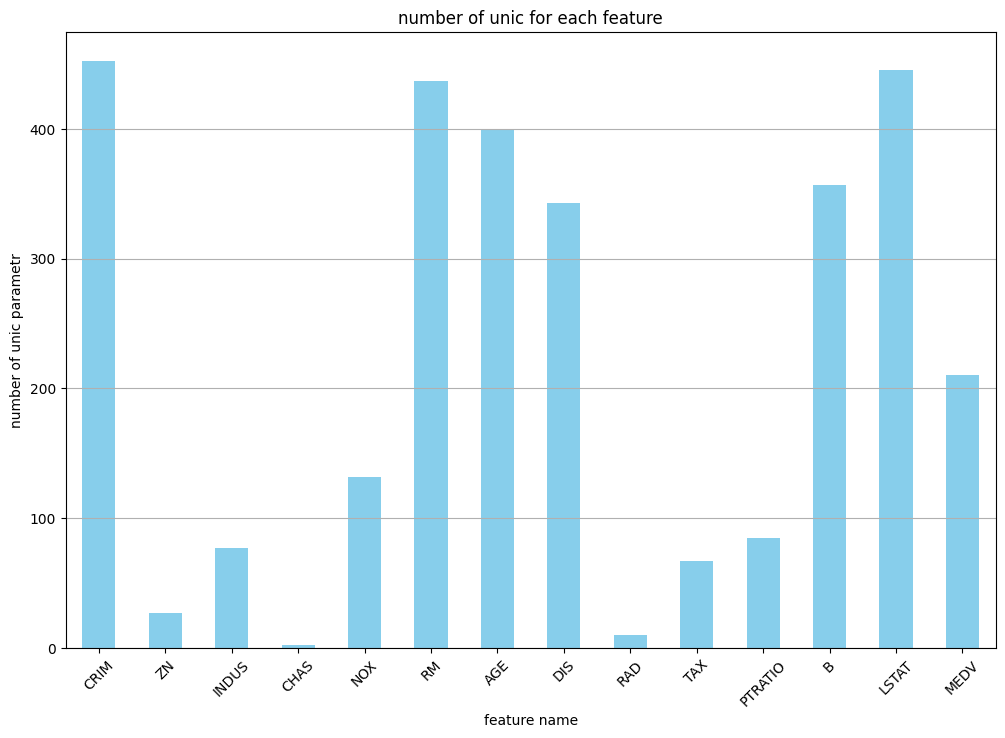

In [14]:
missing_data_count = data.isnull().sum()
missing_data_percentage = (missing_data_count / len(data)) * 100

missing_data_info = pd.DataFrame({'تعداد از دست رفته': missing_data_count, 'درصد از دست رفته': missing_data_percentage})
print(missing_data_info)


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
data.nunique().plot(kind='bar', color='skyblue')
plt.title('number of unic for each feature')
plt.xlabel('feature name')
plt.ylabel('number of unic parametr')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [15]:
import pandas as pd

# Assuming df is your DataFrame and 'column_name' is the name of the column with missing values
# Replace 'column_name' with the actual name of your column

# Remove rows with missing values in a specific column
data = data.dropna(subset=["MEDV"])

# If you want to remove rows with missing values in multiple columns, you can pass a list of column names:
# df = df.dropna(subset=['column_name1', 'column_name2'])

# If you want to remove rows with missing values in any column, you can use:
# df = df.dropna()

# This will remove any row with at least one missing value in any column.

# After executing this, 'df' will contain only the rows where 'column_name' doesn't have missing values.
import pandas as pd
import numpy as np

# Assuming df is your DataFrame

# Calculate mean and variance for each column
means = data.mean()
variances = data.var()

# Subtract mean and divide by square root of variance for each numerical column
for column in data.select_dtypes(include=[np.number]):
    data[column] = (data[column] - means[column]) / np.sqrt(variances[column])

# Now, df contains normalized values for all numerical columns


<ipython-input-15-808274085f01>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = (data[column] - means[column]) / np.sqrt(variances[column])


In step 4, we created a correlation matrix and visualized it using a heatmap. The correlation matrix shows the pairwise correlations between all the features in the dataset. Each cell in the matrix represents the correlation coefficient between two features. The heatmap provides a graphical representation of this correlation matrix, where colors indicate the strength and direction of the correlations.

Correlation coefficients range from -1 to 1, where:
- A coefficient close to 1 indicates a strong positive correlation (as one feature increases, the other also tends to increase).
- A coefficient close to -1 indicates a strong negative correlation (as one feature increases, the other tends to decrease).
- A coefficient close to 0 indicates no linear correlation between the features.

By examining the heatmap, we can identify which features are positively or negatively correlated with each other. Additionally, we can determine which features have a stronger correlation with the target column (MEDV), which helps in feature selection for predictive modeling.

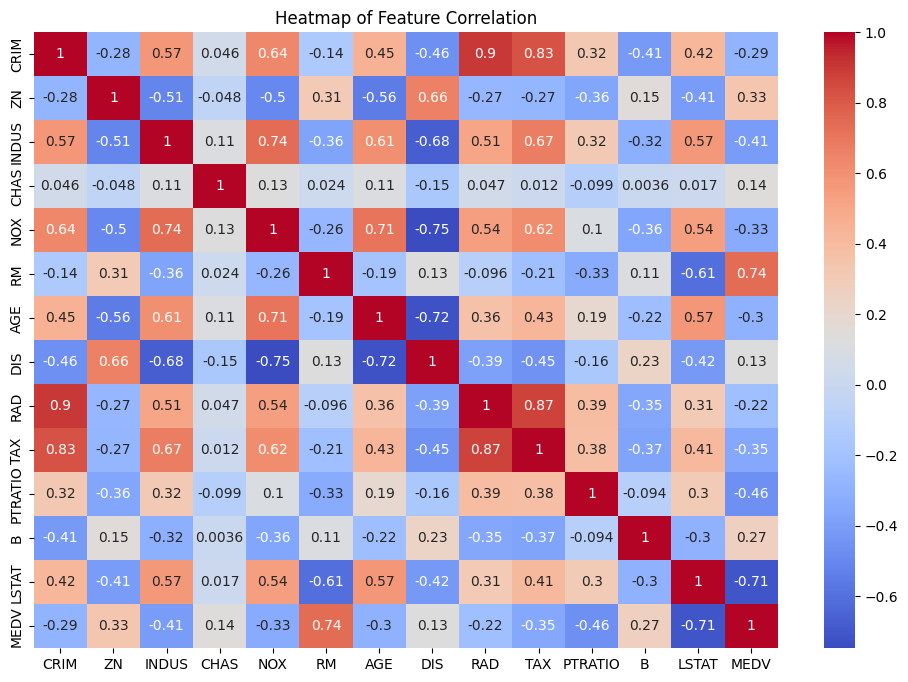

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap of Feature Correlation")
plt.show()

Scatter and hexbin charts are commonly used to visualize the relationship between two numerical variables and are particularly useful for checking dependencies with the target column in predictive modeling tasks.

1. **Scatter Plot**:
   - **Use**: Scatter plots display individual data points as dots on a two-dimensional plane, with one variable plotted on the x-axis and another on the y-axis. They are used to visualize the relationship and pattern between two continuous variables.
   - **Meaning**: The pattern observed in a scatter plot can indicate the nature of the relationship between the variables. For example, a positive slope suggests a positive correlation, a negative slope suggests a negative correlation, and no discernible pattern suggests no correlation. Scatter plots can help identify outliers and clusters within the data.

2. **Hexbin Plot**:
   - **Use**: Hexbin plots are similar to scatter plots but are especially useful when dealing with a large number of data points. Instead of plotting individual points, hexbin plots divide the plot area into hexagonal bins and count the number of points within each bin. The color intensity of each bin represents the density of points.
   - **Meaning**: Hexbin plots provide a visual representation of the distribution and density of data points, making it easier to identify areas of high concentration or density. They are particularly effective for visualizing patterns in dense datasets and can reveal underlying structures that may not be apparent in scatter plots.

Both scatter and hexbin plots can help identify correlations between features and the target column (MEDV) by visually inspecting the patterns and trends in the data points. They provide valuable insights into the relationships between variables and assist in feature selection and predictive modeling.

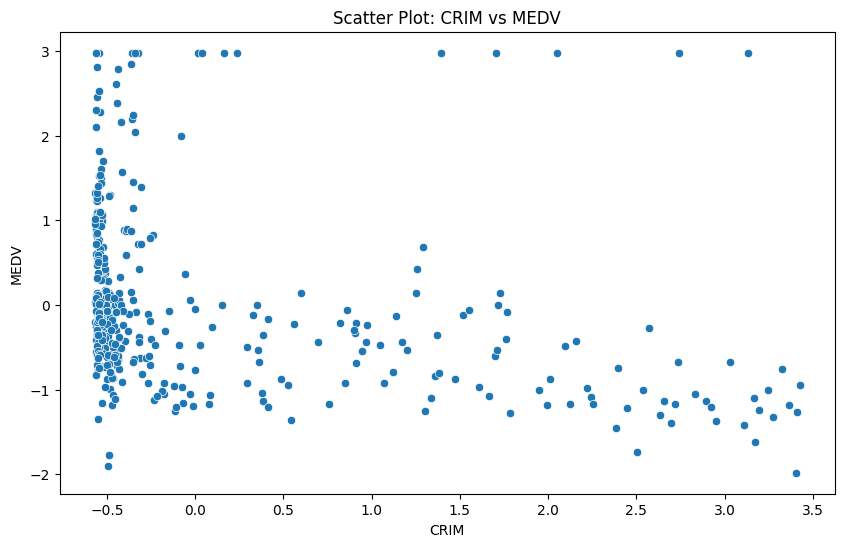

<Figure size 1000x600 with 0 Axes>

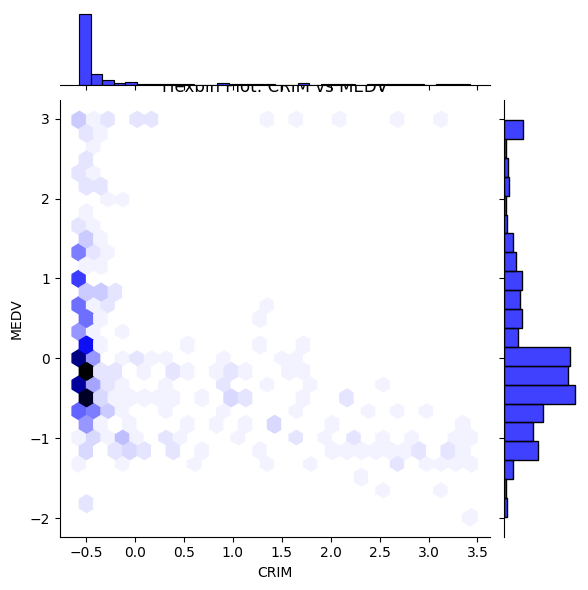

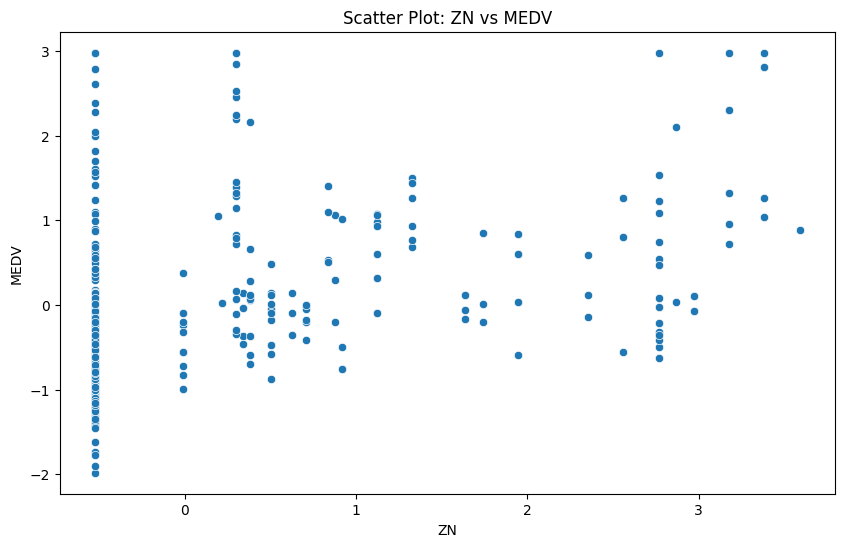

<Figure size 1000x600 with 0 Axes>

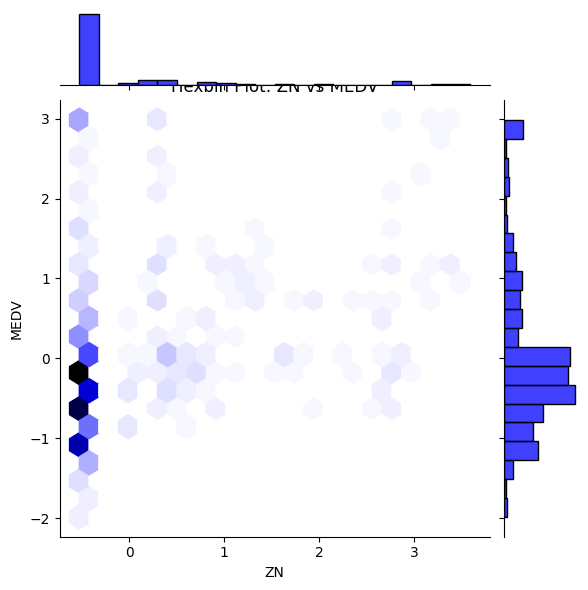

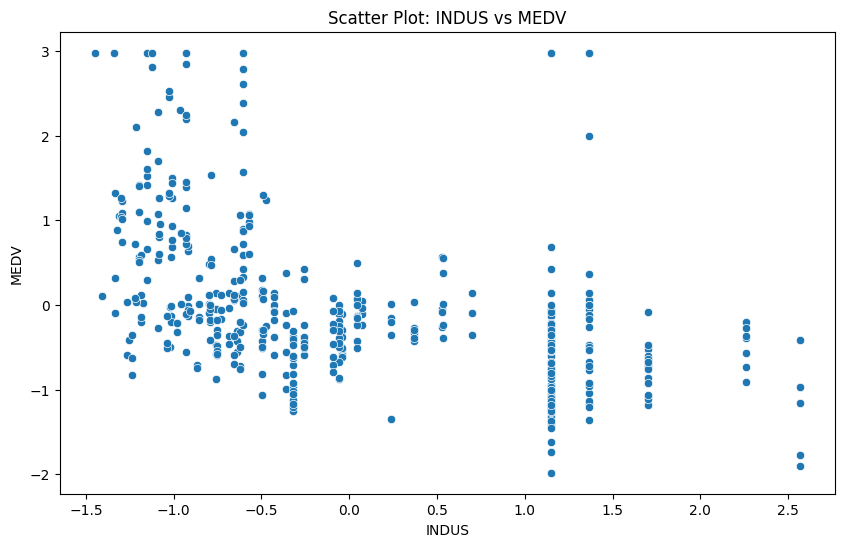

<Figure size 1000x600 with 0 Axes>

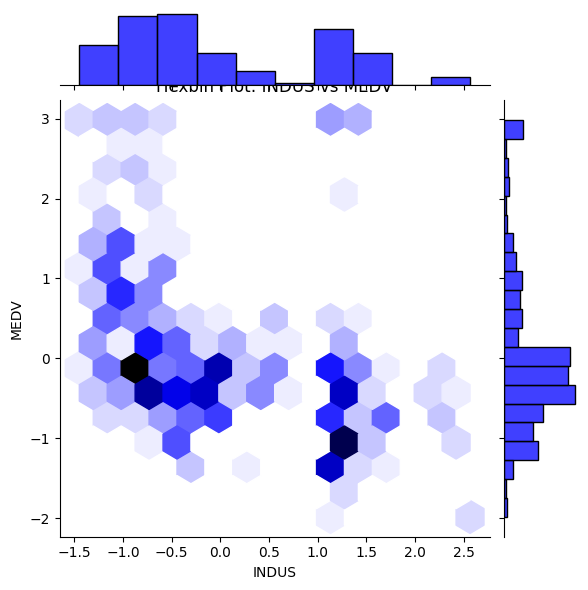

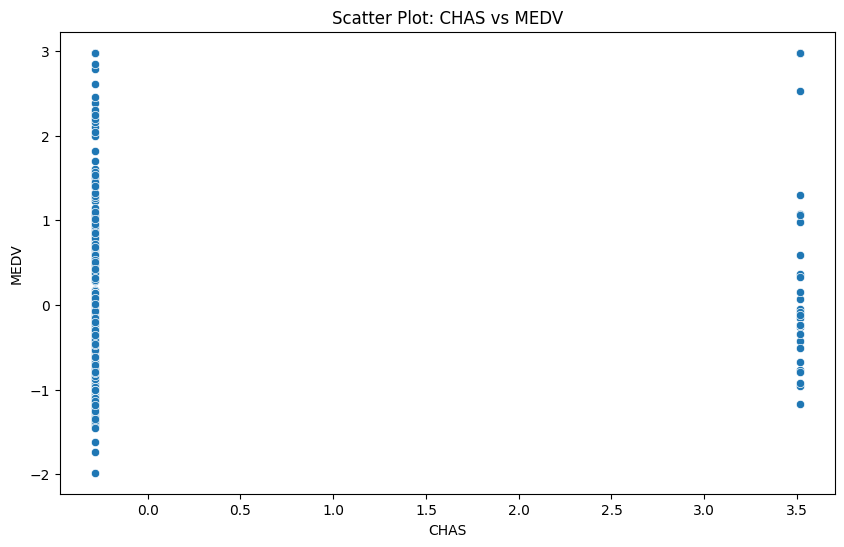

<Figure size 1000x600 with 0 Axes>

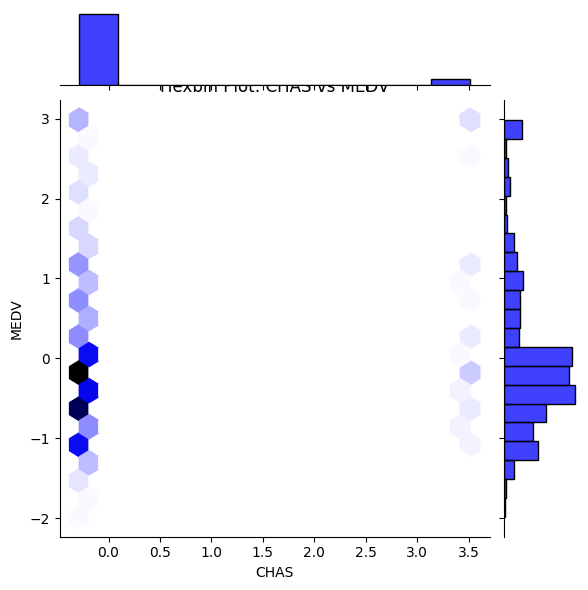

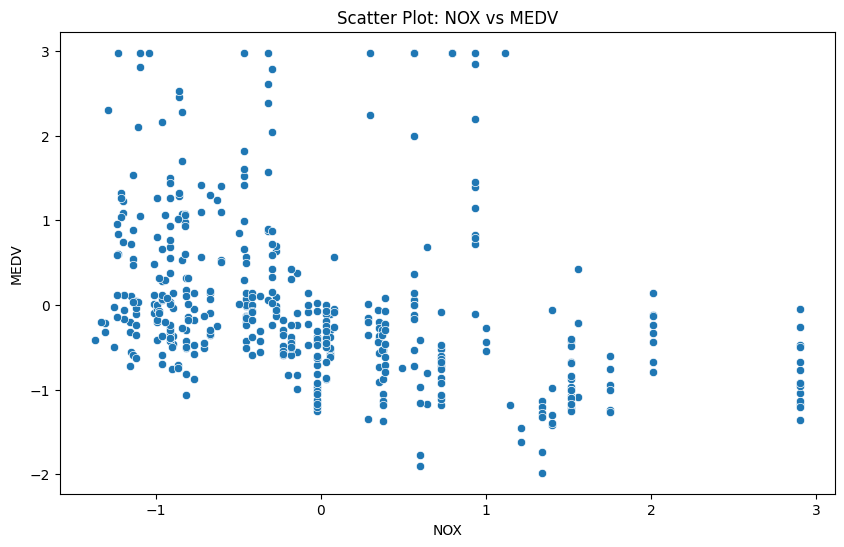

<Figure size 1000x600 with 0 Axes>

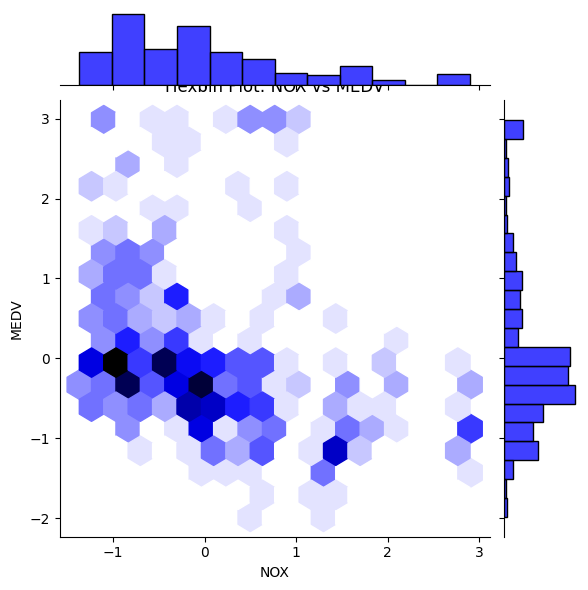

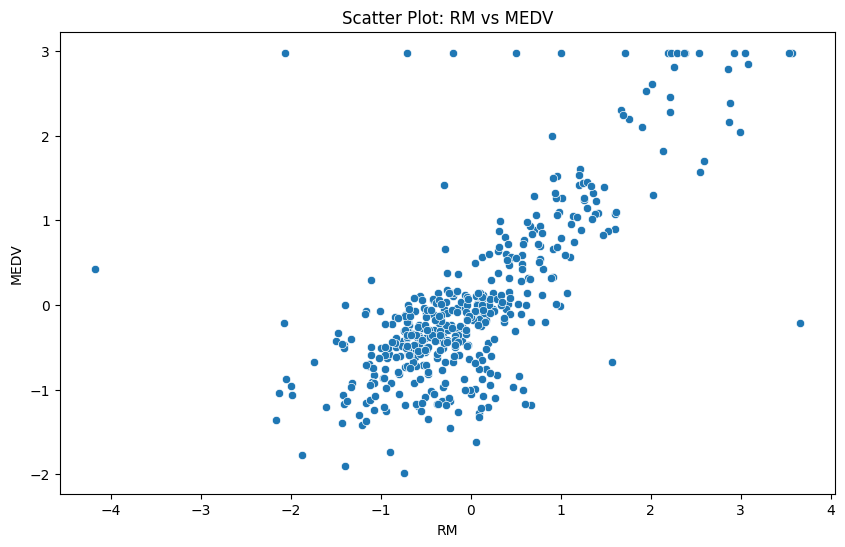

<Figure size 1000x600 with 0 Axes>

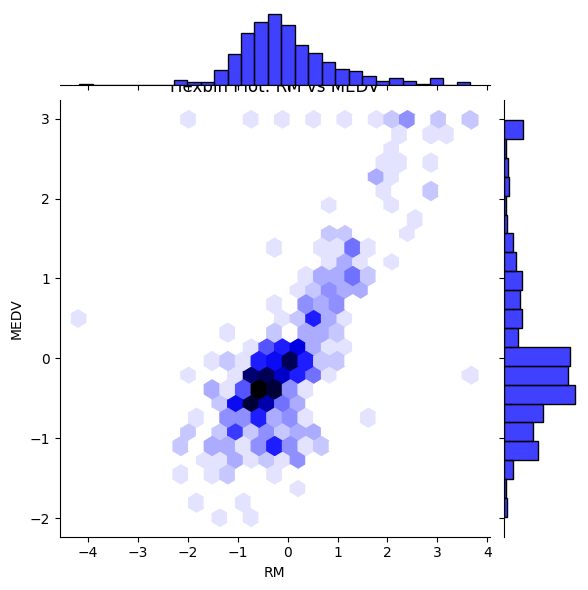

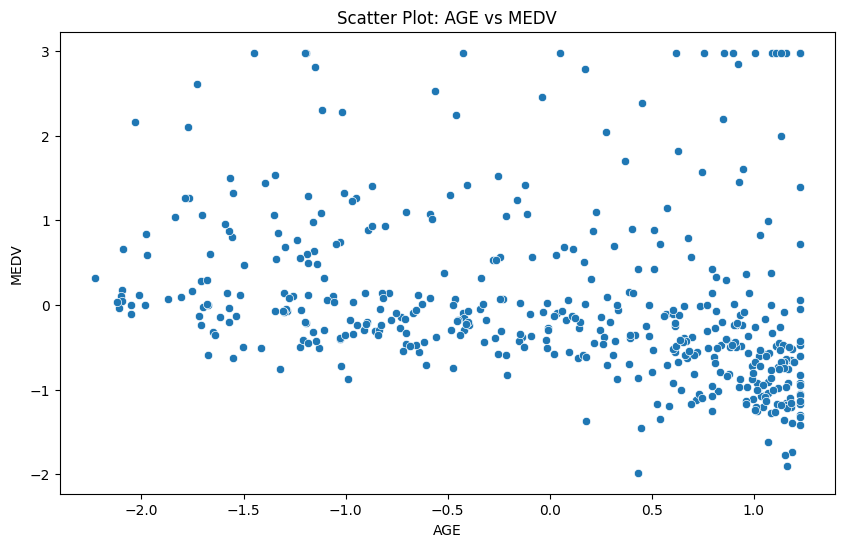

<Figure size 1000x600 with 0 Axes>

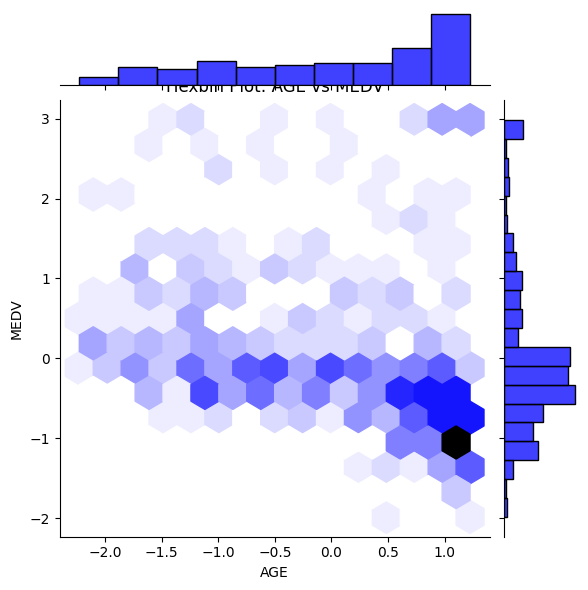

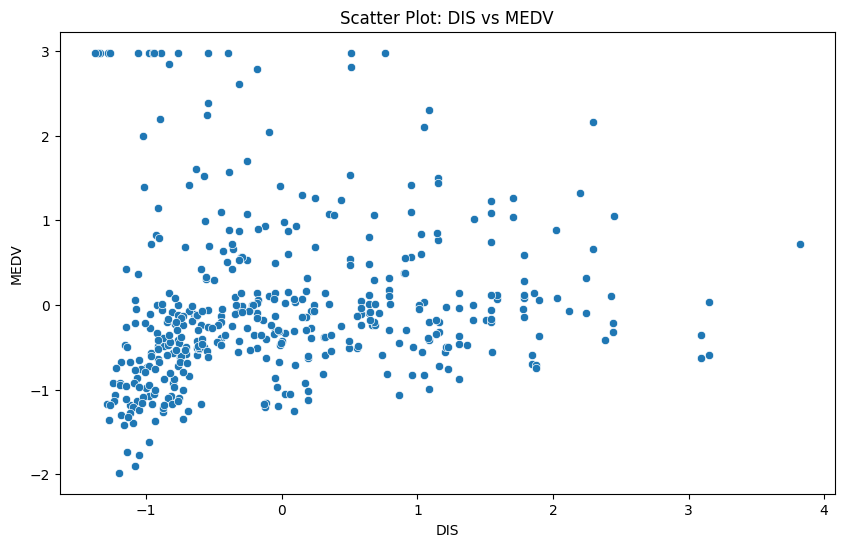

<Figure size 1000x600 with 0 Axes>

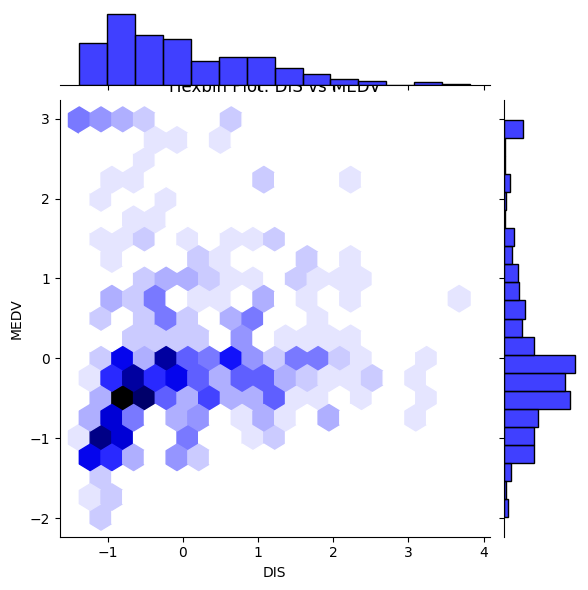

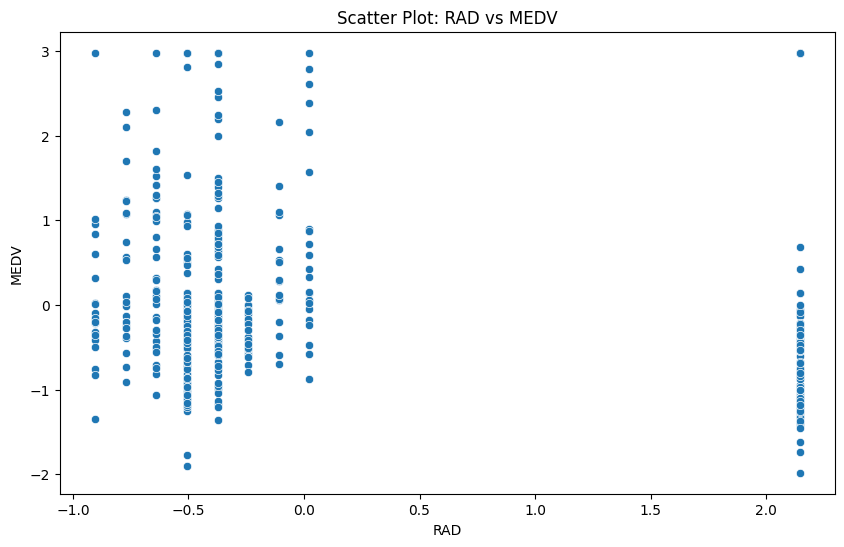

<Figure size 1000x600 with 0 Axes>

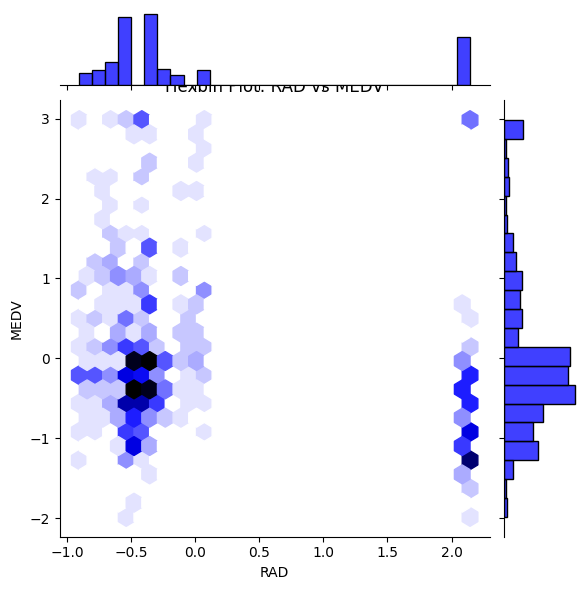

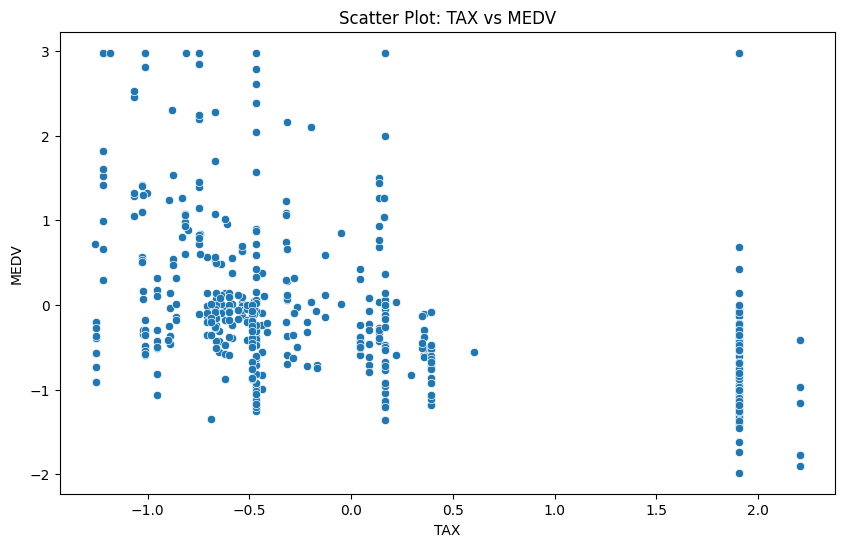

<Figure size 1000x600 with 0 Axes>

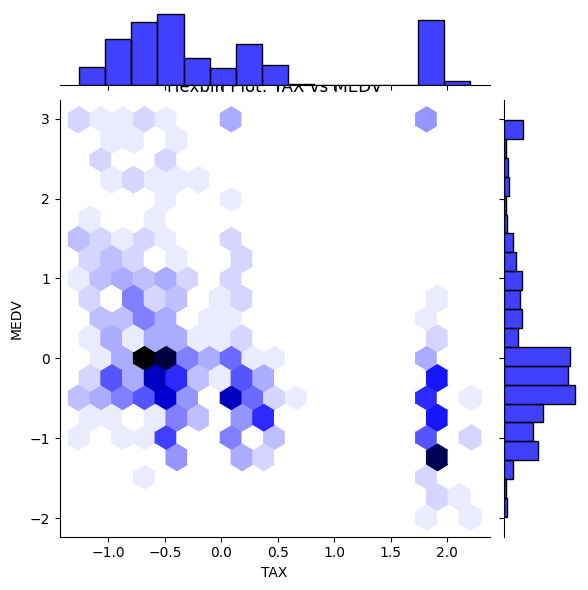

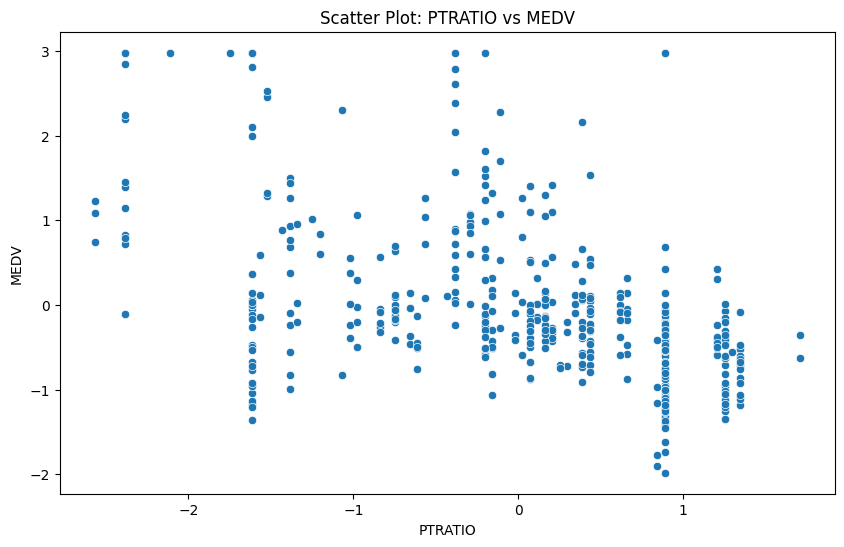

<Figure size 1000x600 with 0 Axes>

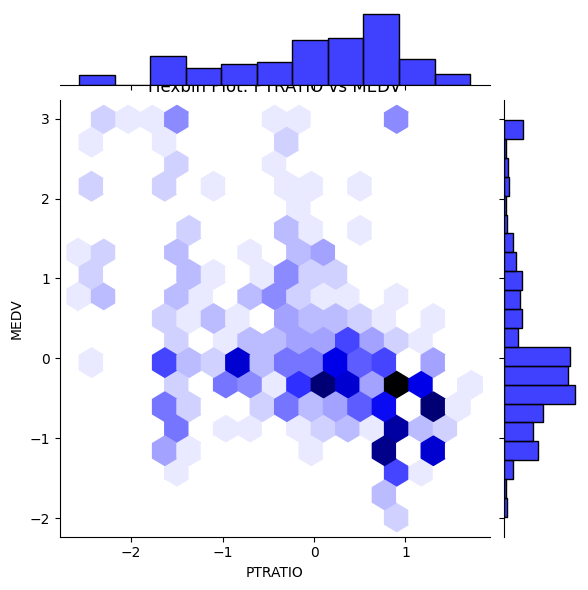

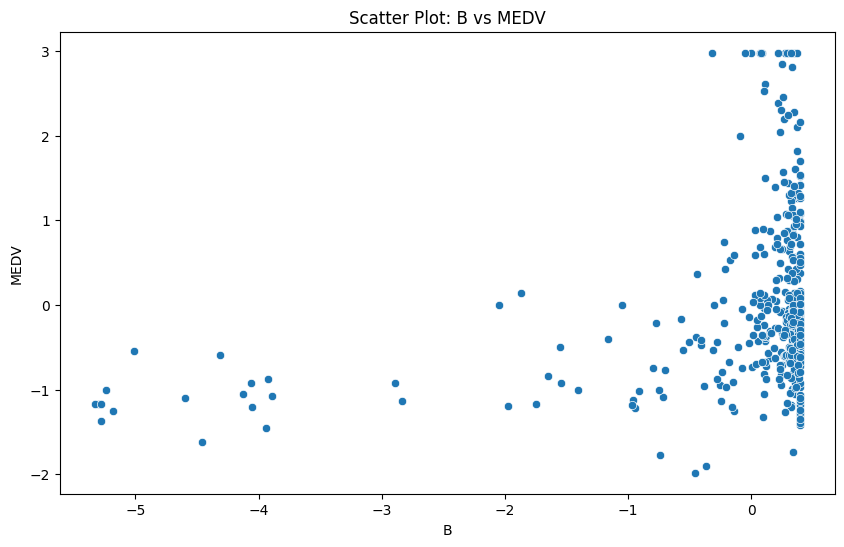

<Figure size 1000x600 with 0 Axes>

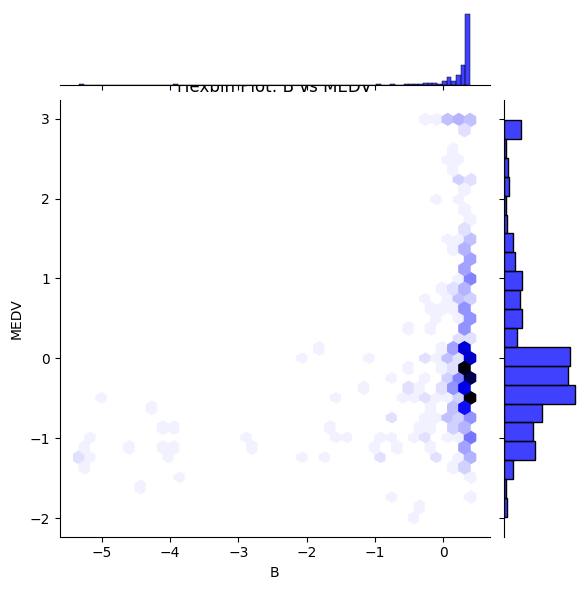

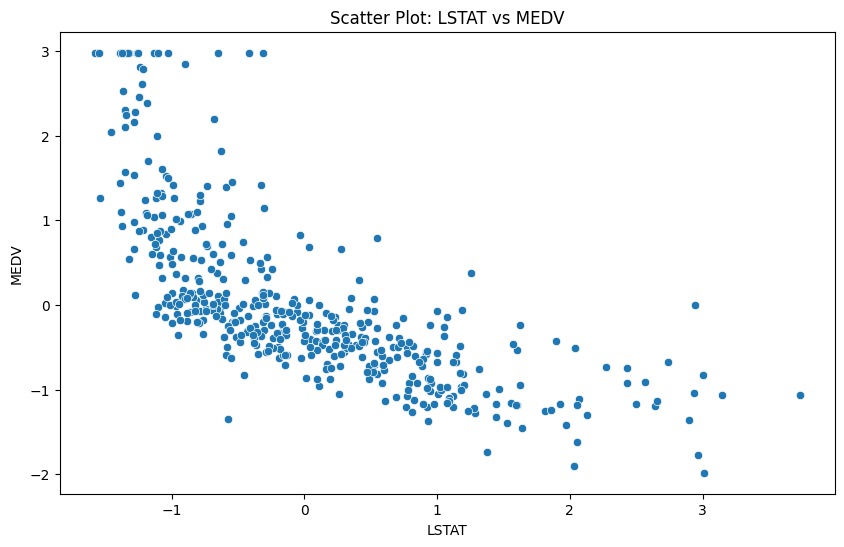

<Figure size 1000x600 with 0 Axes>

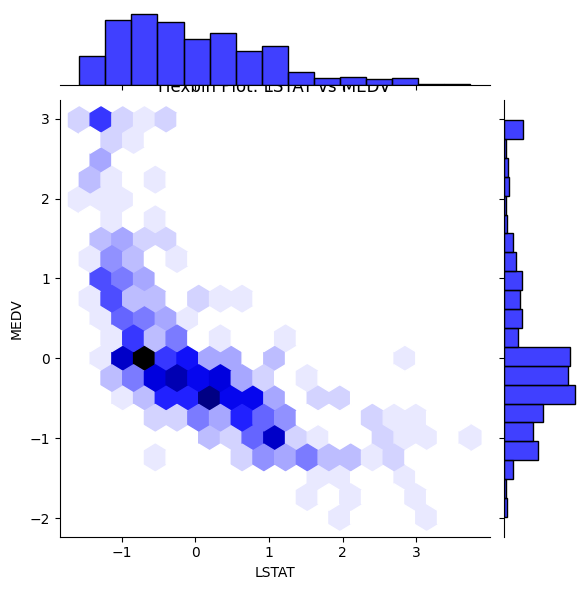

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_features_vs_MEDV(data):
    """
    Plot each feature against the target column (MEDV) using scatter and hexbin plots.

    Args:
    - data (DataFrame): The DataFrame containing the dataset

    Returns:
    - None
    """
    # Function to create scatter plot
    def scatter_plot(x, y):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=x, y=y, data=data)
        plt.title(f'Scatter Plot: {x} vs {y}')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

    # Function to create hexbin plot
    def hexbin_plot(x, y):
        plt.figure(figsize=(10, 6))
        sns.jointplot(x=x, y=y, data=data, kind='hex', color='b')
        plt.title(f'Hexbin Plot: {x} vs {y}')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

    # Get the list of features
    features = [col for col in data.columns if col != 'MEDV']

    # Plot each feature against the target column (MEDV)
    for feature in features:
        scatter_plot(feature, 'MEDV')
        hexbin_plot(feature, 'MEDV')

# Call the function
plot_features_vs_MEDV(data)


To enhance your dataset, you can incorporate various surveys related to housing, demographics, economic indicators, or environmental factors. Here are some ideas and potential sources for additional data:

1. **Demographic Data**: Include information about the population in different neighborhoods or regions, such as age distribution, household size, education level, and employment status. You can find demographic data from government census surveys, demographic databases, or community surveys conducted by local authorities.

2. **Economic Indicators**: Incorporate economic data that may influence housing prices, such as unemployment rates, median household income, inflation rates, and GDP growth. Economic indicators are typically available from government agencies like the Bureau of Labor Statistics, the U.S. Census Bureau, or central banks.

3. **Property Characteristics**: Expand your dataset with more detailed property characteristics, such as the year built, square footage, number of bedrooms and bathrooms, and property tax information. This data can be obtained from real estate listings, property assessment records, or real estate agencies.

4. **Crime Rates**: Consider including data on crime rates in different areas, including property crime, violent crime, and other relevant statistics. Crime data is often collected and published by law enforcement agencies, government departments, or research institutions.

5. **Transportation Accessibility**: Include information about transportation infrastructure and accessibility, such as proximity to public transit stops, highways, or major roads. This data may impact housing prices, especially in urban areas. Sources for transportation data include transit agencies, transportation departments, or mapping services like Google Maps.

6. **Environmental Factors**: Explore environmental data that could affect housing prices, such as air quality, proximity to parks or green spaces, flood risk, or proximity to industrial sites. Environmental data may be available from environmental agencies, research institutions, or environmental monitoring programs.

7. **School Quality**: Consider adding data on school quality, such as school ratings, student-teacher ratios, or standardized test scores. This information is valuable for homebuyers with children and can impact housing demand and prices. School data may be sourced from educational departments, school district websites, or education-focused organizations.

8. **Market Trends**: Incorporate historical housing market data, including trends in home sales, price appreciation, housing inventory, and foreclosure rates. Market trend data can provide insights into the dynamics of the real estate market and help forecast future trends. Real estate associations, market research firms, or government agencies may publish this data.

By integrating additional surveys and datasets into your analysis, you can create a more comprehensive understanding of the factors influencing housing prices and improve the accuracy of your predictive models. Remember to ensure that the datasets are compatible, properly cleaned, and appropriately merged to maintain data integrity and reliability.

Preprocessing your dataset is indeed a critical step in preparing it for machine learning tasks. Here are some common preprocessing steps you might consider:

1. **Handling Missing Values**: Identify and handle missing values in your dataset. You can choose to remove rows or columns with missing values, impute missing values using mean, median, or mode, or use advanced techniques like interpolation or predictive modeling to fill missing values.

2. **Handling Outliers**: Detect and handle outliers in your dataset. Outliers can significantly affect the performance of your machine learning models. You can choose to remove outliers, cap or clip extreme values, or use robust techniques that are less sensitive to outliers.

3. **Encoding Categorical Variables**: If your dataset contains categorical variables, you need to encode them into numerical format before feeding them into machine learning models. This can be done using techniques like one-hot encoding, label encoding, or binary encoding.

4. **Feature Scaling**: Scale numerical features to a similar scale to prevent features with larger magnitudes from dominating the learning process. Common scaling techniques include min-max scaling, standardization (z-score scaling), and robust scaling.

5. **Feature Engineering**: Create new features from existing ones to improve model performance. This can involve transformations, interactions, or combinations of existing features. Domain knowledge plays a crucial role in feature engineering.

6. **Dimensionality Reduction**: Reduce the number of features in your dataset to decrease computational complexity and improve model generalization. Techniques like principal component analysis (PCA), feature selection, or feature extraction can be used for dimensionality reduction.

7. **Data Normalization**: Normalize your data to ensure that different features have similar ranges and distributions. This can help improve convergence and performance, especially for algorithms sensitive to feature scales, such as gradient descent-based methods.

8. **Handling Imbalanced Classes**: If your dataset has imbalanced class distributions, apply techniques like resampling (oversampling or undersampling), class weighting, or using evaluation metrics that are robust to class imbalance.

9. **Splitting the Dataset**: Split your dataset into training, validation, and test sets to evaluate model performance and prevent overfitting. The training set is used to train the model, the validation set is used for hyperparameter tuning and model selection, and the test set is used for final evaluation.

By performing these preprocessing steps, you can ensure that your dataset is clean, standardized, and well-suited for training machine learning models. This can lead to more efficient model training, improved model performance, and better generalization to unseen data.

In [18]:
# data.fillna(data.mean(), inplace=True)

# data.fillna(data.median(), inplace=True)

data.fillna(data.mode().iloc[0], inplace=True)
print(data)

         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.566733  0.217000 -1.176220 -0.283935 -0.024739  0.347120 -0.012727   
1   -0.558323 -0.522948 -0.475922 -0.283935 -0.630982  0.116169  0.474349   
2   -0.558331 -0.522948 -0.475922 -0.283935 -0.630982  1.261927 -0.158494   
3   -0.556296 -0.522948 -1.195346 -0.283935 -0.727629  0.981486 -0.702455   
4   -0.541599 -0.522948 -1.195346 -0.283935 -0.727629  1.204939 -0.403810   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.544172 -0.522948  0.239089 -0.283935  0.282775  0.374115  0.125930   
502 -0.551127 -0.522948  0.239089 -0.283935  0.282775 -0.335236  0.396133   
503 -0.544921 -0.522948  0.239089 -0.283935  0.282775  0.948493  0.904541   
504 -0.525357 -0.522948  0.239089 -0.283935  0.282775  0.675551  0.844100   
505 -0.550270 -0.522948  0.239089 -0.283935  0.282775 -0.470207  0.541900   

          DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  

Yes, it's possible to delete columns from the dataset. Deleting columns might be necessary for several reasons:

1. **Irrelevant Features**: Some columns may not contribute useful information to the analysis or prediction task at hand. Removing these irrelevant features can simplify the dataset and improve model performance by reducing noise.

2. **Highly Correlated Features**: If two or more columns are highly correlated, keeping both may not add much value and could lead to multicollinearity issues in regression models. Removing one of the highly correlated features can mitigate this problem.

3. **Data Leakage**: Columns that contain information about the target variable or that are derived from the target variable can cause data leakage if included in the model training process. Removing such columns ensures that the model learns from only independent variables.

4. **High Percentage of Missing Values**: Columns with a high percentage of missing values may not provide meaningful information for analysis. Deleting these columns can simplify data preprocessing and modeling.

In [19]:
duplicated_columns = data.columns[data.T.duplicated()]
print("ستون‌های تکراری:", duplicated_columns)
data = data.drop(columns=duplicated_columns)

ستون‌های تکراری: Index([], dtype='object')


Numerical features represent quantitative data that can be measured or counted, typically expressed as numbers. These features are continuous or discrete. Examples include age, weight, temperature, etc. On the other hand, categorical features represent qualitative data and are often expressed as labels or categories. These features can be nominal or ordinal. Examples include gender (male, female), color (red, blue, green), etc.

The main differences between numerical and categorical features are:

1. **Nature of Data**: Numerical features contain numeric data that can be measured, while categorical features contain qualitative data that represents categories or labels.

2. **Operations**: Numerical features can undergo mathematical operations like addition, subtraction, etc., while categorical features cannot undergo such operations directly.

3. **Representation**: Numerical features are typically represented by numbers, whereas categorical features are represented by labels or categories.

In the given dataset, numerical features might include columns such as "CRIM" (crime rate), "ZN" (proportion of residential land zoned for large plots), "INDUS" (proportion of non-retail business acres per town), etc. These features contain quantitative data that can be measured.

Categorical features in the dataset might include columns such as "CHAS" (Charles River dummy variable), "RAD" (index of accessibility to radial highways), etc. These features represent categories or labels rather than quantitative measurements.

In [20]:
import pandas as pd

print(data.dtypes)

# Identify numerical features (columns with numeric data types)
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical features (columns with object or categorical data types)
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
Numerical Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Categorical Features: []


The purpose of normalizing or standardizing numerical features is to scale the values within a specific range or distribution, which can be beneficial for certain machine learning algorithms.

**Normalization** typically refers to scaling the features so that they have a mean of 0 and a standard deviation of 1. This ensures that all features have the same scale, which can be important for algorithms that rely on the Euclidean distance, such as K-Nearest Neighbors and Support Vector Machines.

**Standardization**, on the other hand, involves transforming the data to have a mean of 0 and a standard deviation of 1, but it doesn't necessarily force the values to fall within a specific range. It's particularly useful when the features have varying scales and the algorithm doesn't assume a specific distribution of the data.

In summary, normalization and standardization both aim to make the features more comparable and easier for machine learning algorithms to process. The main difference lies in how they scale the data: normalization centers the data around 0 and scales it to have a standard deviation of 1, while standardization only centers the data around 0 and scales it to have a standard deviation of 1 without enforcing a specific range.

For categorical features that are stored as strings or objects in the dataset, one useful preprocessing step is **encoding**. Encoding transforms categorical variables into a numerical format that can be easily utilized by machine learning algorithms. Two common encoding techniques are:

1. **Label Encoding**: This method assigns a unique integer to each category in the feature. It's suitable for ordinal categorical variables, where there's an inherent order among the categories. However, it might not be appropriate for nominal categorical variables, where there's no inherent order.

2. **One-Hot Encoding**: This technique creates binary columns for each category in the feature, where each column represents one category and contains binary values (0 or 1) indicating the presence or absence of that category in the original data. One-hot encoding is suitable for both ordinal and nominal categorical variables.

The choice between label encoding and one-hot encoding depends on the nature of the categorical feature and the requirements of the machine learning algorithm being used. Generally, one-hot encoding is preferred for nominal categorical variables to avoid introducing unintended ordinal relationships between categories. Label encoding may be suitable for ordinal variables where the order matters.

In machine learning, it's essential to split the dataset into multiple subsets for training, validation, and testing. Here's an explanation of common segmentation methods:

1. **Training Set**: This subset of the data is used to train the machine learning model. The model learns patterns, relationships, and features from this data.

2. **Validation Set**: After training the model, this subset is used to fine-tune model hyperparameters and evaluate its performance during training. It helps in preventing overfitting by providing an independent dataset for model evaluation.

3. **Test Set**: This subset is used to evaluate the final performance of the trained model. It serves as an unbiased estimate of the model's performance on unseen data. The test set should ideally resemble real-world data that the model will encounter in deployment.

Common segmentation methods for splitting the dataset include:

- **Holdout Method**: The dataset is randomly split into training, validation, and test sets with predefined ratios. For example, 70% for training, 15% for validation, and 15% for testing.

- **K-Fold Cross-Validation**: The dataset is divided into K folds. The model is trained K times, each time using K-1 folds for training and one fold for validation. This method helps in utilizing the entire dataset for training and validation, reducing bias in model evaluation.

- **Stratified Sampling**: This method ensures that each segment of the dataset has a proportional representation in the training, validation, and test sets. It's particularly useful when dealing with imbalanced datasets where certain classes or categories are underrepresented.

- **Time-Based Splitting**: For time-series data, such as financial data or sensor data collected over time, it's common to split the dataset chronologically. The training set contains data from earlier time periods, the validation set contains data from intermediate time periods, and the test set contains data from the most recent time periods.

Each segmentation method has its advantages and is suitable for different scenarios. The choice of method depends on factors such as dataset size, distribution, and the nature of the problem being solved.

In [21]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(data, test_size=0.25, random_state=42)

validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print("تعداد داده‌های آموزش:", len(train_data))
print("تعداد داده‌های اعتبارسنجی:", len(validation_data))
print("تعداد داده‌های آزمون:", len(test_data))

تعداد داده‌های آموزش: 339
تعداد داده‌های اعتبارسنجی: 56
تعداد داده‌های آزمون: 57


Some other preprocessing methods commonly used in machine learning projects include:

1. Feature Scaling: Scaling features to a similar range can improve the performance of certain machine learning algorithms. Common scaling techniques include Min-Max scaling and Standardization.

2. Feature Encoding: Converting categorical features into numerical representations that can be understood by machine learning algorithms. Common encoding techniques include one-hot encoding and label encoding.

3. Feature Selection: Selecting a subset of relevant features from the dataset can improve model performance and reduce overfitting. Techniques include univariate feature selection, recursive feature elimination, and feature importance ranking.

4. Imputation: Filling missing values in the dataset using techniques such as mean, median, or mode imputation, or more advanced methods like KNN imputation or interpolation.

5. Dimensionality Reduction: Reducing the number of features in the dataset while preserving its important information can speed up training and improve model performance. Techniques include Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE).

6. Outlier Detection and Removal: Identifying and removing outliers from the dataset can improve the robustness and generalization of machine learning models. Techniques include statistical methods, such as z-score or IQR, and advanced algorithms like isolation forest or Local Outlier Factor (LOF).

7. Data Augmentation: Generating additional training examples by applying transformations such as rotation, translation, or flipping to the existing data. This technique is commonly used in computer vision tasks.

These preprocessing methods can be applied as needed based on the characteristics of the dataset and the requirements of the machine learning model being developed.

Supervised, unsupervised, semi-supervised, and reinforcement learning are different types of machine learning paradigms, each with its own characteristics and applications:

1. Supervised Learning:
   - In supervised learning, the algorithm learns from labeled data, where each input example is associated with a corresponding target or output label.
   - The goal is to learn a mapping from input features to output labels, such that the algorithm can accurately predict the label for new, unseen data.
   - Examples include classification, where the output label is a categorical variable (e.g., spam detection), and regression, where the output label is a continuous variable (e.g., house price prediction).
   - Example: Training a model to classify emails as either spam or non-spam based on features extracted from the email content and metadata, using a labeled dataset of emails.

2. Unsupervised Learning:
   - In unsupervised learning, the algorithm learns patterns and structures from unlabeled data, without explicit input-output pairs.
   - The goal is to discover hidden patterns, group similar data points, or reduce the dimensionality of the data.
   - Examples include clustering, where the algorithm groups similar data points together (e.g., customer segmentation), and dimensionality reduction, where the algorithm reduces the number of features while preserving important information (e.g., image compression).
   - Example: Clustering news articles into topics based on their content similarity, without any prior labels or categories.

3. Semi-Supervised Learning:
   - Semi-supervised learning combines elements of both supervised and unsupervised learning. It leverages a small amount of labeled data and a larger amount of unlabeled data.
   - The goal is to improve the performance of supervised learning models by incorporating additional unlabeled data during training.
   - Examples include using a combination of labeled and unlabeled data for training a classification model, where the labeled data provides supervision, and the unlabeled data helps in learning more robust representations.
   - Example: Training a sentiment analysis model using a small set of labeled movie reviews (positive or negative sentiment) along with a large set of unlabeled reviews, to improve the model's performance.

4. Reinforcement Learning:
   - In reinforcement learning, the algorithm learns through interaction with an environment to achieve a specific goal or maximize a cumulative reward.
   - The agent learns by taking actions in the environment, observing the resulting state changes and rewards, and updating its strategy to maximize long-term rewards.
   - Examples include training autonomous agents (e.g., robots or game-playing agents) to navigate environments, play games, or control systems.
   - Example: Training a self-driving car to navigate through traffic by learning to make driving decisions (e.g., accelerating, braking, turning) based on environmental cues (e.g., road conditions, traffic signals) and feedback (e.g., collisions, reaching the destination).

Regression and classification are two fundamental types of supervised learning tasks in machine learning:

1. Regression:
   - Regression is a type of supervised learning task where the goal is to predict a continuous target variable based on one or more input features.
   - The target variable in regression analysis is quantitative and can take any real value within a certain range.
   - The objective of regression is to learn the relationship between the input features and the target variable, such that given new input data, the model can predict the corresponding target value.
   - Examples of regression tasks include predicting house prices based on features such as area, number of bedrooms, and location, or forecasting stock prices based on historical market data.

2. Classification:
   - Classification is another type of supervised learning task where the goal is to predict the category or class label of an input data point.
   - The target variable in classification is categorical, meaning it belongs to a discrete set of classes or categories.
   - The objective of classification is to learn a decision boundary or mapping from input features to class labels, so that the model can correctly assign a class label to new, unseen data instances.
   - Examples of classification tasks include predicting whether an email is spam or not spam, classifying images of handwritten digits into their respective numerical labels (0-9), or identifying whether a tumor is malignant or benign based on medical imaging data.

Key Differences between Regression and Classification:
- **Nature of Target Variable**: In regression, the target variable is continuous and quantitative, whereas in classification, the target variable is categorical and qualitative.
- **Output Representation**: Regression models output a numerical value representing the predicted target variable, while classification models output class labels or probabilities associated with each class.
- **Evaluation Metrics**: Different evaluation metrics are used for regression and classification tasks. For regression, metrics like Mean Squared Error (MSE) or R-squared are commonly used, while for classification, metrics like accuracy, precision, recall, and F1-score are used.
- **Decision Boundary**: In regression, the relationship between input features and the target variable is typically represented by a continuous function, while in classification, the decision boundary separates different classes in the feature space.
- **Applications**: Regression is often used for tasks involving prediction or forecasting of numerical values, such as sales forecasting or demand prediction. Classification is used for tasks involving assigning category labels to input data, such as sentiment analysis or image classification.

Linear regression is a statistical method used to model the relationship between a dependent variable (often denoted as \( y \)) and one or more independent variables (often denoted as \( x \)). The relationship is assumed to be linear, meaning that changes in the independent variables are associated with a linear change in the dependent variable.

The relationship between the independent variables (\( x \)) and the dependent variable (\( y \)) is represented by the equation of a straight line:

\[ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n + \epsilon \]

where:
- \( \beta_0 \) is the intercept term,
- \( \beta_1, \beta_2, \ldots, \beta_n \) are the coefficients of the independent variables,
- \( x_1, x_2, \ldots, x_n \) are the independent variables,
- \( \epsilon \) is the error term, representing the difference between the observed and predicted values.

The goal of linear regression is to estimate the coefficients (\( \beta_0, \beta_1, \ldots, \beta_n \)) that minimize the sum of squared differences between the observed and predicted values of the dependent variable. This is often done using the method of least squares.

Linear regression can be used for various purposes, including:
- Predictive modeling: Given new values of the independent variables, predict the value of the dependent variable.
- Understanding relationships: Assess the strength and direction of the relationship between the independent and dependent variables.
- Hypothesis testing: Determine whether there is a statistically significant relationship between the independent and dependent variables.

Overall, linear regression provides a simple and interpretable way to model the relationship between variables and make predictions based on that relationship. However, it assumes a linear relationship between the variables, which may not always be the case in real-world scenarios.

In simple linear regression, we aim to find the relationship between two variables: one independent variable (\( x \)) and one dependent variable (\( y \)). The main form of the simple linear regression function is expressed as:

\[ f(x) = \alpha x + \beta \]

Here, \( \alpha \) represents the slope of the line (the rate at which \( y \) changes with respect to \( x \)) and \( \beta \) represents the y-intercept (the value of \( y \) when \( x = 0 \)).

To find the optimal values of \( \alpha \) and \( \beta \) that best fit the data, we minimize the Residual Sum of Squares (RSS) function. The RSS is the sum of the squared differences between the observed values of \( y \) and the values predicted by the regression line.

The steps involved in finding the optimal parameters are:

1. **Compute RSS of the training data**: Calculate the sum of squared residuals for the given data points using the formula:
\[ RSS = \sum_{i=1}^{n} (y_i - (\hat{\beta} + \hat{\alpha} \cdot x_i))^2 \]

2. **Compute the derivatives of the RSS function**: Take the derivatives of the RSS function with respect to \( \alpha \) and \( \beta \) and set them equal to 0 to find the minimum RSS.

   For \( \beta \):
   \[ \frac{\partial RSS}{\partial \beta} = \sum_{i=1}^{n} (-f(x_i) + \hat{\beta} + \hat{\alpha} \cdot x_i) = 0 \]
   This simplifies to:
   \[ \hat{\beta} = \bar{y} - \hat{\alpha} \bar{x} \]

   For \( \alpha \):
   \[ \frac{\partial RSS}{\partial \alpha} = \sum_{i=1}^{n} (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i^2) = 0 \]
   After simplification, we get:
   \[ \hat{\alpha} = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2}} \]

Finally, after obtaining the optimal values of \( \hat{\alpha} \) and \( \hat{\beta} \), we can calculate the predicted values of \( y \) using the formula \( \hat{y} = \hat{\alpha} x + \hat{\beta} \), where \( \hat{y} \) represents the predicted value of \( y \) for a given \( x \).

In [22]:
import numpy as np

target_column = 'MEDV'
x = train_data['RM']
y = train_data[target_column]

N = len(x)
m = (N * np.sum(x * y) - np.sum(x) * np.sum(y)) / (N * np.sum(x**2) - np.sum(x)**2)
b = (np.sum(y) - m * np.sum(x)) / N

print(m , b)

def linear_regression(x):
    return m * x + b

y_pred = linear_regression(x)
print("مقادیر پیش‌بینی‌شده:", y_pred)

x_test = test_data[['RM']]
y_test = test_data[target_column]

y_pred = linear_regression(x_test)
print("مقادیر پیش‌بینی شده:", y_pred)

y_pred = np.array(y_pred)
y_test = np.array(y_test)
mse = np.mean((y_pred - y_test) ** 2)

print(mse)
# محاسبه ریشه میانگین مربعات خطا (RMSE)
rmse = np.sqrt(mse)

print("\n\nRMSE:", rmse)

y_mean = sum(y_test) / len(y_test)
ss_tot = sum((y - y_mean) ** 2 for y in y_test)
ss_res = sum((y_test[i] - y_pred[i]) ** 2 for i in range(len(y_test)))
r2 = 1-(ss_res / ss_tot)

print('R2 score:' , r2)

0.7203399834579519 0.012016942665883917
مقادیر پیش‌بینی‌شده: 131   -0.006929
429    0.051407
286   -0.110636
16    -0.429319
467   -0.355860
         ...   
106   -0.536267
270   -0.514661
348    0.326878
489   -0.992146
102    0.078414
Name: RM, Length: 339, dtype: float64
مقادیر پیش‌بینی شده:            RM
234  0.425184
153 -0.673462
284  0.816246
474 -0.978102
72  -0.288882
75  -0.050140
487 -0.461727
280  1.607012
180  1.547597
165 -0.249992
391 -0.304006
278  0.161595
22  -0.205700
45  -0.702630
430  0.016838
299  0.765473
25  -0.792293
79  -0.495216
287 -0.133322
312 -0.334254
168 -0.014491
24  -0.441202
140 -0.171131
245 -0.785812
338 -0.295364
5    0.105421
441  0.079494
248  0.108662
471 -0.111716
104 -0.178693
497 -0.581638
55   0.990171
395  0.149712
457 -0.428238
30  -0.669141
113 -0.259715
19  -0.654017
56   0.054647
9   -0.354779
302  0.175639
196  1.031222
449  0.091377
298  0.013597
78  -0.108475
76  -0.057702
450  0.450031
185 -0.193817
500 -0.329933
11  -0.349378
101 

Decision trees are popular due to their simplicity and interpretability. They're easy to understand and visualize, making them useful for both beginners and experts in machine learning. Plus, they can handle both numerical and categorical data, making them versatile for various types of datasets. Additionally, decision trees can be used for classification and regression tasks, making them even more widely applicable. Overall, decision trees are a powerful tool in the machine learning toolkit.

KNN, or k-nearest neighbors, is indeed a straightforward and intuitive algorithm. It's commonly used for both classification and regression tasks because of its simplicity and effectiveness. By calculating the distances between the new example and all the examples in the training data, KNN identifies the k closest neighbors. Then, it makes predictions based on the majority label or average value of these nearest neighbors.

The choice of the parameter k is crucial in KNN. A smaller value of k can lead to more flexible decision boundaries but might also make the model more sensitive to noise. Conversely, a larger value of k can lead to smoother decision boundaries but might oversimplify the model. Finding the right balance for k is often achieved through cross-validation or other tuning techniques. Overall, KNN is a powerful algorithm for its simplicity and flexibility.

Pruning is a technique used in decision trees to reduce the size of the tree by removing unnecessary branches or nodes. The main concept behind pruning is to prevent overfitting, which occurs when the decision tree captures noise in the training data and thus performs poorly on unseen data.

Advantages of pruning:

1. **Prevents Overfitting**: By removing unnecessary branches or nodes, pruning helps to simplify the decision tree, making it less likely to overfit the training data and improving its generalization ability on unseen data.
  
2. **Reduces Complexity**: Pruning results in a simpler and more interpretable decision tree, which is easier to understand and interpret by humans.
  
3. **Improves Computational Efficiency**: A pruned decision tree requires less memory and computational resources for both training and prediction, making it more efficient, especially for large datasets.

Disadvantages of pruning:

1. **Loss of Information**: Pruning may lead to the loss of valuable information contained in the data, especially if overly aggressive pruning is applied, resulting in an overly simplified model.

2. **Dependent on Pruning Parameters**: The effectiveness of pruning depends on the pruning parameters chosen, such as the pruning criterion and the pruning depth. Selecting optimal pruning parameters can be challenging and may require experimentation.

3. **Potential Underfitting**: Overly aggressive pruning may result in underfitting, where the decision tree is too simplified and fails to capture important patterns in the data, leading to decreased predictive performance.

In summary, pruning is a valuable technique in decision tree learning for preventing overfitting and improving model generalization. However, it requires careful parameter tuning to balance between model simplicity and predictive performance.

Decision trees can have several advantages over other models in certain scenarios:

1. **Interpretability**: Decision trees are highly interpretable models, making them suitable for applications where understanding the decision-making process is important. The structure of a decision tree can be visualized and easily understood by non-experts, allowing stakeholders to gain insights into the factors influencing the predictions.

2. **Handling Nonlinearity and Interaction Effects**: Decision trees can effectively capture nonlinear relationships and interaction effects between features in the data. Unlike linear models, decision trees can model complex decision boundaries without assuming linearity, making them more flexible in handling diverse datasets.

3. **Robustness to Outliers and Irrelevant Features**: Decision trees are robust to outliers and irrelevant features in the data. They make locally optimal decisions at each node based on feature splits, which can help mitigate the impact of outliers and focus on relevant features for prediction.

4. **Mixed Data Types**: Decision trees can handle both numerical and categorical features without the need for feature scaling or one-hot encoding. This makes them suitable for datasets with mixed data types, simplifying the preprocessing steps.

5. **Scalability**: Decision trees are relatively fast to train and can scale well to large datasets with moderate computational resources. In addition, ensemble methods like Random Forests and Gradient Boosting can further improve prediction accuracy without sacrificing interpretability.

Overall, decision trees are advantageous in scenarios where interpretability, flexibility, and robustness to outliers are important considerations. They are commonly used in areas such as healthcare, finance, and marketing where understanding the underlying decision-making process is crucial.

The inherent difference between KNN classification and other classification methods like neural networks or logistic regression lies in their approaches to training and making predictions:

1. **KNN (K-Nearest Neighbors)**:
   - **Training**: KNN does not involve a training phase in the traditional sense. Instead, it stores all training instances and their labels in memory. During prediction, it calculates the distance between the new instance and all training instances to find the k nearest neighbors. The majority class among these neighbors determines the label of the new instance.
   - **Lazy Learning**: KNN is a lazy learning algorithm because it postpones the learning phase until a prediction is needed. It does not explicitly learn a model from the training data but rather memorizes the entire dataset and computes predictions at runtime based on local similarities.

2. **Neural Networks**:
   - **Training**: Neural networks undergo a training phase where they learn the optimal parameters (weights and biases) from the training data through an optimization process like gradient descent. During training, the network adjusts its parameters to minimize the discrepancy between predicted and actual labels. This process involves forward propagation to compute predictions and backward propagation (backpropagation) to update the parameters based on the calculated gradients.
   - **Model-Based Learning**: Neural networks are model-based learning algorithms that learn to approximate complex functions mapping inputs to outputs through multiple layers of interconnected neurons. They learn a mapping from input features to output labels by iteratively updating the parameters of the network.

3. **Logistic Regression**:
   - **Training**: Logistic regression undergoes a training phase where it learns the optimal coefficients (weights) from the training data to make predictions. It employs optimization techniques like gradient descent to minimize a cost function, such as the logistic loss or cross-entropy loss. During training, logistic regression estimates the probabilities of different classes based on input features and adjusts the weights to maximize the likelihood of the observed data.
   - **Model-Based Learning**: Logistic regression is a model-based learning algorithm that models the relationship between input features and the probability of different classes using a logistic (sigmoid) function. It learns a linear decision boundary by finding the optimal weights through the training process.

In summary, the main difference lies in how they are trained: KNN relies on storing and comparing instances at runtime, while neural networks and logistic regression undergo a training phase to learn model parameters from the training data. KNN is instance-based and lazy learning, while neural networks and logistic regression are model-based and eager learning algorithms.

The One Nearest Neighbor (1NN) algorithm is a variation of the K-Nearest Neighbors (KNN) algorithm where only the single nearest neighbor to a given instance is considered for classification or regression. In 1NN, the label of the nearest neighbor is used to classify or predict the label of the new instance.

**Advantages of 1NN**:

1. **Simplicity**: 1NN is straightforward and easy to implement. It involves minimal complexity in terms of parameter tuning and model selection.

2. **Locality Sensitivity**: 1NN is sensitive to local patterns and structures in the data. It can capture fine-grained distinctions between instances within the dataset.

3. **Adaptability to Non-Linear Boundaries**: Unlike linear models, 1NN can handle non-linear decision boundaries since it relies on the distance metric to determine nearest neighbors.

4. **No Training Overhead**: 1NN does not require an explicit training phase. It stores the entire dataset in memory and performs computations at runtime, making it suitable for online learning scenarios.

**Disadvantages of 1NN**:

1. **High Computational Cost**: Since 1NN computes the distance between the new instance and all training instances, it can be computationally expensive, especially for large datasets. The time complexity of 1NN for classification is O(n), where n is the number of instances in the dataset.

2. **Sensitivity to Noisy Data**: 1NN is sensitive to noisy or irrelevant features in the dataset, which can lead to misclassifications or poor performance, particularly in high-dimensional spaces.

3. **Overfitting**: 1NN tends to overfit the training data, especially when the dataset is small or noisy. It memorizes the training instances and may fail to generalize well to unseen data.

4. **Imbalanced Data**: In datasets with imbalanced class distributions, where one class is significantly more prevalent than others, 1NN may bias predictions towards the majority class, leading to suboptimal performance on minority classes.

5. **Curse of Dimensionality**: In high-dimensional spaces, the notion of distance becomes less meaningful, and the performance of 1NN deteriorates due to the curse of dimensionality. It requires a larger number of training instances to maintain the same level of local density.

Overall, while 1NN offers simplicity and locality sensitivity, it also comes with computational costs, sensitivity to noisy data, and potential overfitting issues. It is essential to consider the characteristics of the dataset and the trade-offs involved when choosing 1NN as a classification or regression algorithm.

In the K-Nearest Neighbors (KNN) algorithm, the choice of distance metric plays a crucial role in determining the proximity between data points. While the Euclidean distance is the most commonly used distance measure in KNN, there are several alternative distance metrics that can be employed based on the characteristics of the data and the problem domain. Here are some notable distance measurement methods used in KNN:

1. **Manhattan Distance (L1 Norm)**:
   - Manhattan distance, also known as L1 norm or taxicab distance, measures the sum of absolute differences between the coordinates of two points.
   - It calculates the distance by summing the absolute differences along each dimension, forming a grid-like path.
   - Manhattan distance is often preferred when dealing with high-dimensional data or when the attributes have different scales.

2. **Chebyshev Distance (L∞ Norm)**:
   - Chebyshev distance, also known as maximum norm distance, calculates the maximum absolute difference between the coordinates of two points along any dimension.
   - It measures the distance as the maximum absolute difference between corresponding components of the vectors.
   - Chebyshev distance is suitable for scenarios where the maximum difference between dimensions is of interest.

3. **Minkowski Distance**:
   - Minkowski distance is a generalization of both Euclidean and Manhattan distances and is defined as:
     \[ D(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}} \]
   - When \( p = 2 \), Minkowski distance reduces to the Euclidean distance, and when \( p = 1 \), it becomes the Manhattan distance.
   - By varying the value of the parameter \( p \), Minkowski distance can adapt to different scenarios, providing a flexible distance measure.

4. **Cosine Similarity**:
   - Cosine similarity measures the cosine of the angle between two vectors in a high-dimensional space.
   - It is particularly useful for text mining, recommendation systems, and high-dimensional data analysis.
   - Cosine similarity is not a true distance metric, but it quantifies the similarity between vectors rather than their spatial separation.

5. **Hamming Distance**:
   - Hamming distance is used to measure the difference between two binary vectors of equal length.
   - It calculates the number of positions at which the corresponding bits are different.
   - Hamming distance is commonly applied in error detection and correction, DNA sequence analysis, and digital communication.

6. **Jaccard Distance**:
   - Jaccard distance measures dissimilarity between sets by calculating the size of the intersection divided by the size of the union of the sample sets.
   - It is commonly used in text mining, document similarity analysis, and recommendation systems.

These alternative distance metrics provide flexibility in modeling different types of data and can lead to improved performance in specific scenarios compared to the standard Euclidean distance. The choice of distance measure should be based on the characteristics of the dataset and the problem requirements.

In [23]:
import pandas as pd

# Calculate the deciles of the target column (MEDV)
deciles = data['MEDV'].quantile([0.2, 0.8])

# Define the categories based on deciles
luxury_threshold = deciles.iloc[1]  # Top two deciles
economic_threshold = deciles.iloc[0]  # Bottom two deciles

# Function to label the houses based on their prices
def label_houses(price):
    if price >= luxury_threshold:
        return 'Luxury'
    elif price <= economic_threshold:
        return 'Economic'
    else:
        return 'Regular'

# Apply the function to create a new column for house categories
data['House_Category'] = data['MEDV'].apply(label_houses)

# Display the first few rows to verify the changes
print(data.head())


       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.566733  0.217000 -1.176220 -0.283935 -0.024739  0.347120 -0.012727   
1 -0.558323 -0.522948 -0.475922 -0.283935 -0.630982  0.116169  0.474349   
2 -0.558331 -0.522948 -0.475922 -0.283935 -0.630982  1.261927 -0.158494   
3 -0.556296 -0.522948 -1.195346 -0.283935 -0.727629  0.981486 -0.702455   
4 -0.541599 -0.522948 -1.195346 -0.283935 -0.727629  1.204939 -0.403810   

        DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  \
0  0.021076 -0.904489 -0.538187 -1.339563  0.393137 -1.049614  0.028331   
1  0.435569 -0.771925 -0.895028 -0.203232  0.393137 -0.373898 -0.244130   
2  0.435569 -0.771925 -0.895028 -0.203232  0.334417 -1.203924  1.243053   
3  0.953082 -0.639360 -1.027192  0.205847  0.393137 -1.380974  1.095470   
4  0.953082 -0.639360 -1.027192  0.205847  0.393137 -0.992763  1.413341   

  House_Category  
0        Regular  
1        Regular  
2         Luxury  
3         Luxury  
4  

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 1. Prepare the Data
X = data.drop(['MEDV', 'House_Category'], axis=1)  # Features
y = data['House_Category']  # Target variable

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# 4. Optimize Parameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 5. Train the Model
best_dt_classifier = grid_search.best_estimator_
best_dt_classifier.fit(X_train, y_train)

# 6. Evaluate the Model
y_pred = best_dt_classifier.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Economic       0.70      0.78      0.74        18
      Luxury       0.78      0.82      0.80        17
     Regular       0.87      0.82      0.84        56

    accuracy                           0.81        91
   macro avg       0.78      0.81      0.79        91
weighted avg       0.82      0.81      0.81        91



In [25]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained your decision tree model (named 'dt_model') and have a test dataset (X_test, y_test)
# Make predictions on the test dataset
y_pred = best_dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8131868131868132


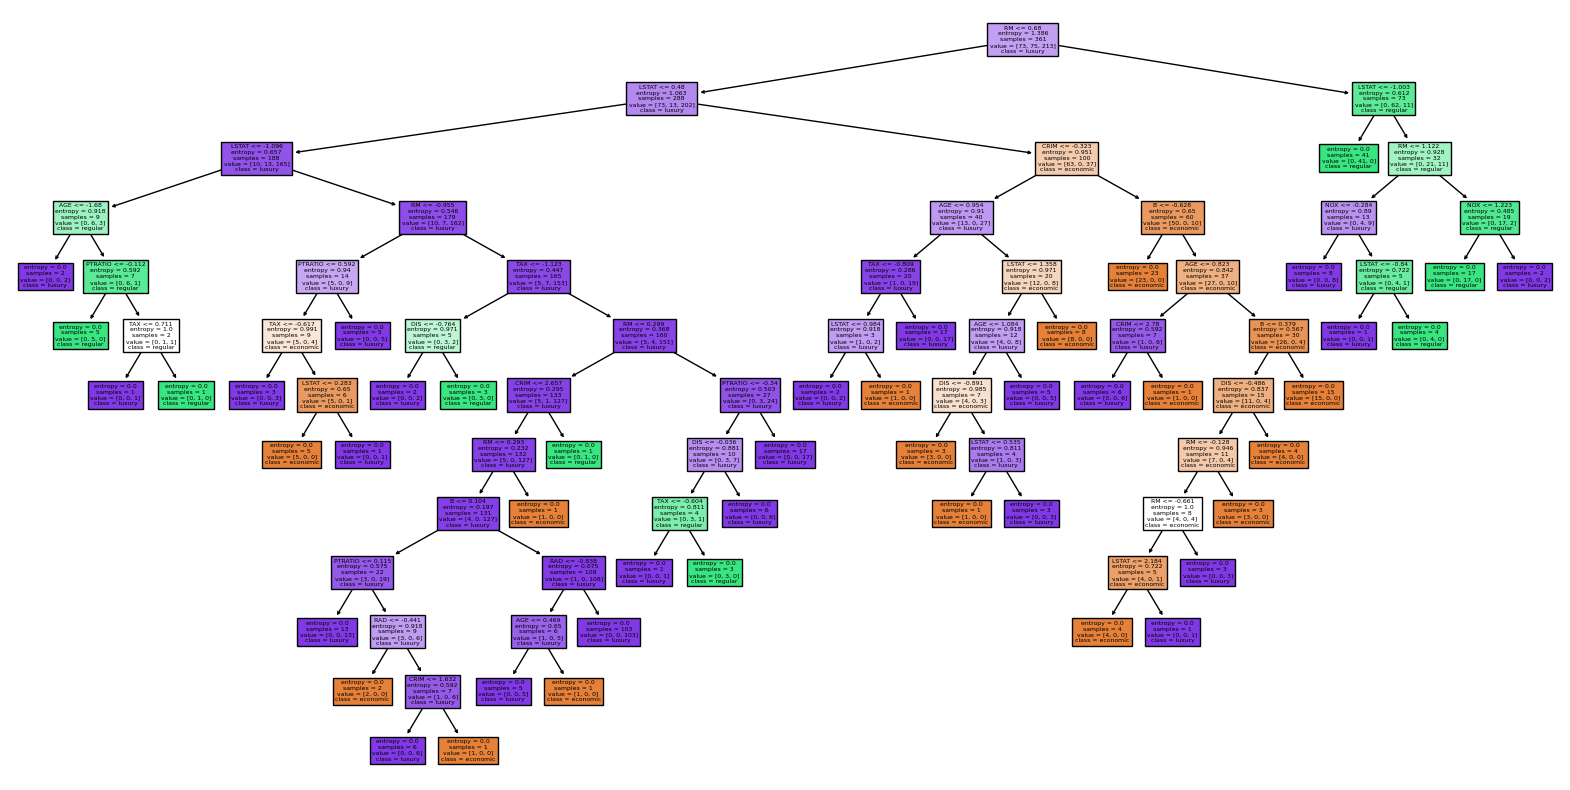

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the final decision tree
plt.figure(figsize=(20,10))
plot_tree(best_dt_classifier, filled=True, feature_names=X.columns, class_names=['economic', 'regular', 'luxury'])
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Instantiate the GridSearchCV object
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_knn.fit(X_train, y_train)

# Get the best parameters
best_params_knn = grid_search_knn.best_params_
print("Best parameters for KNN:", best_params_knn)

# Get the best score
best_score_knn = grid_search_knn.best_score_
print("Best accuracy score for KNN:", best_score_knn)

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best accuracy score for KNN: 0.8423896499238964


Underfitting and overfitting are common phenomena that occur during the training of machine learning models, especially when the model's complexity is not appropriately matched to the complexity of the underlying data patterns. Here's an explanation of each:

1. **Underfitting**:
   - **Occurrence**: Underfitting occurs when the model is too simple to capture the underlying patterns in the data. It typically happens when the model lacks the capacity to represent the relationships between the features and the target variable.
   - **Characteristics**:
     - High bias: The model makes overly simplistic assumptions about the data, leading to systematic errors.
     - Poor performance on both the training and validation/test datasets.
     - Inadequate fit: The model fails to capture the underlying structure of the data and performs poorly on unseen examples.
   - **Causes**:
     - Using a very simple model with insufficient complexity.
     - Insufficient training data.
     - Oversimplified feature engineering or feature selection.
   - **Mitigation**:
     - Increase model complexity (e.g., add more layers to neural networks, increase tree depth in decision trees).
     - Use more sophisticated algorithms.
     - Improve feature engineering to capture more relevant information.

2. **Overfitting**:
   - **Occurrence**: Overfitting occurs when the model captures noise or random fluctuations in the training data, rather than learning the true underlying relationships. The model becomes overly complex and memorizes the training data, leading to poor generalization to new, unseen data.
   - **Characteristics**:
     - Low bias: The model fits the training data very well, achieving high accuracy or low error.
     - High variance: The model's performance degrades significantly on validation or test datasets.
     - Good performance on the training dataset but poor performance on unseen data.
   - **Causes**:
     - Using a highly complex model with excessive capacity.
     - Training the model for too many iterations or epochs.
     - Insufficient regularization or constraints on model parameters.
     - Noisy or insufficient training data.
   - **Mitigation**:
     - Reduce model complexity (e.g., limit tree depth in decision trees, reduce the number of layers/neurons in neural networks).
     - Apply regularization techniques (e.g., L1 or L2 regularization).
     - Use dropout or other regularization methods in neural networks.
     - Increase training data size or improve data quality.

Balancing between underfitting and overfitting is crucial for building models that generalize well to new data while capturing the underlying patterns effectively.

That's a concise and accurate summary of ensemble methods, particularly Bagging and Boosting. Let's expand a bit on each:

1. **Bagging (Bootstrap Aggregating)**:
   - **Definition**: Bagging involves training multiple instances of the same base learner (e.g., decision trees) on different subsets of the training data. Each subset is randomly sampled with replacement (bootstrap sampling).
   - **Process**: After training, the predictions from each model are aggregated (e.g., by averaging for regression or voting for classification) to make the final prediction.
   - **Purpose**: Bagging helps reduce overfitting by reducing the variance of the model. It achieves this by training models on different subsets of data, thus capturing different aspects of the data's variability.
   - **Example**: Random Forest is a popular ensemble learning algorithm based on bagging, where decision trees are trained on random subsets of features and data.

2. **Boosting**:
   - **Definition**: Boosting involves sequentially training multiple weak learners (e.g., shallow decision trees) where each subsequent model focuses on the errors made by the previous ones. The final prediction is made by combining the weak learners with different weights.
   - **Process**: In boosting, each model is trained with a modified version of the data. Data points that are misclassified by earlier models are given higher weights, forcing subsequent models to focus more on these points.
   - **Purpose**: Boosting aims to reduce bias and improve model performance by iteratively learning from mistakes made by earlier models. It focuses on difficult-to-classify examples, gradually improving the model's accuracy.
   - **Example**: Gradient Boosting Machines (GBM), AdaBoost, and XGBoost are popular boosting algorithms widely used in practice.

Ensemble methods like Bagging and Boosting are powerful techniques in machine learning, often achieving better performance than individual models by leveraging the diversity of multiple models and combining their predictions effectively.

Ensemble methods are used and considered important in machine learning for several reasons:

1. **Improved Performance**: Ensemble methods often outperform individual models by leveraging the diversity of multiple models. By combining the predictions of several weak learners, ensemble methods can achieve better generalization and accuracy.

2. **Reduction of Overfitting**: Ensemble methods, particularly Bagging, help reduce overfitting by averaging or combining the predictions of multiple models trained on different subsets of the data. This diversity helps to smooth out the noise in the data and produce more robust predictions.

3. **Robustness to Noise and Variability**: Ensemble methods are less sensitive to noise and outliers in the data compared to individual models. By combining multiple models, ensemble methods can capture different aspects of the data's variability, leading to more stable and reliable predictions.

4. **Flexibility and Adaptability**: Ensemble methods are versatile and can be applied to a wide range of machine learning tasks, including classification, regression, and clustering. They can be used with different base learners and customized to suit specific problem domains.

5. **State-of-the-Art Performance**: Many state-of-the-art machine learning models and winning solutions in data science competitions rely on ensemble methods. Algorithms like Random Forest, Gradient Boosting Machines (GBM), and XGBoost consistently achieve top performance in various predictive modeling tasks.

6. **Scalability and Efficiency**: Despite combining multiple models, ensemble methods are often computationally efficient and scalable. Modern implementations of ensemble algorithms are optimized for performance and can handle large datasets with millions of observations and features.

Overall, ensemble methods are of great importance in modern machine learning practice because they provide a powerful framework for improving predictive accuracy, reducing overfitting, and building robust and reliable models for real-world applications.

Boosting and Bagging are both ensemble methods used in machine learning to improve the performance of predictive models. While they share the goal of reducing variance and improving accuracy, they differ in their approaches and mechanisms:

1. **Bagging (Bootstrap Aggregating)**:
   - **Mechanism**: Bagging involves training multiple base learners (often decision trees) independently on different bootstrap samples of the training data. Each bootstrap sample is created by randomly sampling the training dataset with replacement.
   - **Training Process**: Each base learner is trained on a subset of the data, and their predictions are aggregated to make the final prediction. The aggregation method typically involves averaging the predictions for regression tasks or taking a majority vote for classification tasks.
   - **Diversity**: The key idea behind Bagging is to create diverse base learners by training them on different subsets of the data. This diversity helps reduce overfitting and variance in the final prediction.

2. **Boosting**:
   - **Mechanism**: Boosting involves sequentially training multiple base learners, where each subsequent learner focuses on correcting the errors made by the previous ones. Unlike Bagging, where base learners are trained independently, Boosting trains base learners sequentially in a stage-wise fashion.
   - **Training Process**: In Boosting, each base learner is trained on a weighted version of the training data, where the weights are adjusted to give more emphasis to the instances that were misclassified by previous learners. The final prediction is made by aggregating the predictions of all base learners, often using a weighted sum.
   - **Adaptive Learning**: Boosting adapts the training process to emphasize instances that are difficult to classify, leading to a strong ensemble model with improved performance, particularly on hard-to-classify instances.
   - **Examples**: AdaBoost (Adaptive Boosting), Gradient Boosting Machines (GBM), XGBoost, and LightGBM are popular Boosting algorithms.

**Differences**:
- Bagging trains multiple base learners independently in parallel, while Boosting trains base learners sequentially, with each subsequent learner focusing on correcting the errors of the previous ones.
- Bagging aims to reduce variance and overfitting by creating diverse base learners, while Boosting focuses on reducing bias and improving overall model performance by iteratively adjusting the training process.
- Bagging typically uses averaging or voting to combine the predictions of base learners, while Boosting uses weighted averaging or additive combination to give more weight to more accurate learners.

In summary, while Bagging and Boosting are both ensemble methods aimed at improving predictive performance, they differ in their training mechanisms and approaches to building the ensemble model. Bagging focuses on reducing variance through diversity, while Boosting focuses on improving overall accuracy through adaptive learning.

description of Random Forests Here's a breakdown of the key points:

1. **Collective Learning Method**: Random Forest is a type of ensemble learning method where multiple decision trees are trained independently and then combined to make predictions.

2. **Composition of Decision Trees**: A Random Forest consists of a collection of decision trees, each trained on a random subset of the training data and features.

3. **Independently Trained Trees**: In a Random Forest, each decision tree is trained independently of the others. This means that the trees are not influenced by each other during the training process.

4. **Combining Predictions**: After training the individual decision trees, the predictions from each tree are combined to make a final prediction. This combination can be done through techniques like averaging (for regression tasks) or voting (for classification tasks).

5. **Effectiveness and Efficiency**: Random Forests are known for their effectiveness in solving complex problems and handling large datasets. They are robust to overfitting, tend to generalize well, and are less sensitive to noise in the data compared to individual decision trees.

6. **Versatility**: Random Forests can be applied to a wide range of tasks, including classification, regression, and feature selection. They are a popular choice for both beginners and experienced practitioners due to their simplicity and high performance.

Overall, Random Forests are a powerful and versatile machine learning algorithm that is widely used in practice for a variety of tasks due to their effectiveness, efficiency, and robustness.

Random Forest is an ensemble learning method that combines the predictions of multiple decision trees to improve the accuracy and robustness of the model. Here's a brief explanation of how Random Forest works:

1. **Bootstrapping**: Random Forest starts by creating multiple bootstrap samples (random subsets with replacement) from the original training data. Each bootstrap sample is used to train a decision tree.

2. **Random Feature Selection**: During the training of each decision tree, a random subset of features is selected at each split point. This helps to introduce diversity among the trees and prevents them from being highly correlated.

3. **Independent Training**: Each decision tree in the Random Forest is trained independently of the others. This means that the trees are not influenced by each other during the training process.

4. **Voting or Averaging**: Once all the decision trees are trained, predictions are made by aggregating the predictions of each individual tree. For classification tasks, the class with the most votes among the trees is chosen as the final prediction. For regression tasks, the predictions of all trees are averaged to produce the final prediction.

5. **Reduced Variance**: By combining the predictions of multiple trees, Random Forests reduce the variance of the model and improve its generalization performance. This helps to mitigate the risk of overfitting and makes the model more robust to noise in the data.

Overall, Random Forests are a powerful and versatile machine learning algorithm that is widely used for both classification and regression tasks due to their effectiveness, efficiency, and robustness.

Bootstrapping is a resampling technique used in Random Forests to create multiple training datasets from the original dataset. The concept behind bootstrapping is to generate new datasets by randomly sampling observations from the original dataset with replacement.

Here's how bootstrapping works in Random Forests:

1. **Sampling with Replacement**: For each tree in the Random Forest, a bootstrap sample is created by randomly selecting observations from the original dataset with replacement. This means that some observations may be selected multiple times, while others may not be selected at all.

2. **Size of Bootstrap Sample**: The size of the bootstrap sample is typically the same as the size of the original dataset. However, since sampling is done with replacement, each bootstrap sample will contain some duplicate observations and may not include all observations from the original dataset.

3. **Training Decision Trees**: Each decision tree in the Random Forest is trained using one of the bootstrap samples. Because each tree is trained on a slightly different subset of the data, they will each capture different patterns and relationships present in the dataset.

4. **Ensemble Learning**: After training all the decision trees, predictions are made by aggregating the predictions of each individual tree. For classification tasks, the class with the most votes among the trees is chosen as the final prediction. For regression tasks, the predictions of all trees are averaged to produce the final prediction.

Bootstrapping affects the results of the Random Forest model in several ways:

- **Increased Diversity**: By creating multiple bootstrap samples, bootstrapping introduces diversity among the decision trees in the Random Forest. Each tree is trained on a slightly different subset of the data, capturing different patterns and reducing the risk of overfitting.

- **Improved Generalization**: The aggregated predictions of multiple trees help improve the generalization performance of the Random Forest model. By combining the predictions of many trees, the model can better capture the underlying relationships in the data and make more accurate predictions on unseen data.

- **Reduced Variance**: Bootstrapping helps reduce the variance of the model by averaging the predictions of multiple trees. This helps mitigate the risk of overfitting and makes the model more robust to noise and outliers in the data.

Overall, bootstrapping is a key component of Random Forests that helps improve the accuracy, robustness, and generalization performance of the model.

The number of decision trees in a Random Forest can indeed affect the efficiency and performance of the model. However, there is no fixed optimal number of trees that applies universally to all datasets and problems. The optimal number of trees often depends on various factors such as the complexity of the dataset, the amount of training data available, and the computational resources available for model training.

In general, increasing the number of trees in the Random Forest tends to improve the model's performance up to a certain point. Adding more trees can help reduce the variance of the model and improve its generalization ability, leading to better accuracy on unseen data. However, beyond a certain threshold, adding more trees may not significantly improve performance and may even increase computational costs without providing noticeable benefits.

Empirically, it is common to experiment with different numbers of trees and evaluate the model's performance using techniques such as cross-validation or holdout validation. By monitoring the model's performance metrics (e.g., accuracy, F1 score, etc.) on a validation set or through cross-validation, one can determine the optimal number of trees that provides the best balance between performance and computational efficiency for a specific dataset and problem.

While there is no one-size-fits-all answer to the best number of trees, some practitioners find that using hundreds to thousands of trees in a Random Forest often yields good results across a wide range of applications. However, it's essential to consider computational constraints and the law of diminishing returns when deciding on the number of trees to use in practice.

Random Forest is a versatile and widely used machine learning algorithm that performs well in many scenarios. However, there are certain situations where it may not be appropriate to use Random Forest, and others where it is highly recommended.

When Random Forest may not be suitable:

1. **Interpretability**: If interpretability of the model is critical and you need to understand the relationship between features and predictions in detail, Random Forest may not be the best choice. Random Forest generates complex ensemble models comprised of multiple decision trees, which can be challenging to interpret compared to simpler models like linear regression.

2. **Computationally Intensive**: Random Forest can be computationally intensive, especially when dealing with large datasets or a large number of trees. If computational resources are limited, training and tuning a Random Forest model may take a significant amount of time and memory.

3. **Imbalanced Data**: When dealing with highly imbalanced datasets, where one class is significantly more prevalent than others, Random Forest may struggle to capture the minority class effectively. While techniques like class weighting or resampling can help mitigate this issue, other algorithms like gradient boosting or ensemble techniques specifically designed to handle class imbalance may be more suitable.

When Random Forest is recommended:

1. **Classification and Regression Tasks**: Random Forest is suitable for both classification and regression tasks. It can handle a wide range of data types, including numerical and categorical features, making it versatile for various predictive modeling problems.

2. **High-Dimensional Data**: Random Forest can effectively handle high-dimensional datasets with many features without requiring feature selection or dimensionality reduction techniques. It can automatically select informative features and ignore irrelevant ones, reducing the risk of overfitting.

3. **Robustness to Overfitting**: Random Forest tends to generalize well and is less prone to overfitting compared to individual decision trees. By aggregating predictions from multiple trees and introducing randomness during training, Random Forest can produce robust models that generalize well to unseen data.

In summary, Random Forest is a powerful and flexible algorithm suitable for many machine learning tasks. However, it's essential to consider factors such as interpretability, computational resources, and the nature of the data when deciding whether to use Random Forest or explore alternative algorithms.

Using Random Forest can help reduce variance compared to individual decision trees, especially when dealing with high-dimensional data or datasets with complex relationships between features and the target variable. Here's how Random Forest helps mitigate variance:

1. **Ensemble of Trees**: Random Forest combines predictions from multiple decision trees trained on different subsets of the data and features. By averaging or taking a majority vote of the predictions, Random Forest reduces the impact of individual trees' variance. This ensemble approach tends to produce more stable and reliable predictions compared to a single decision tree.

2. **Bootstrapping and Random Feature Selection**: Random Forest uses bootstrapping to create random subsets of the training data for each tree. Additionally, at each node of the decision tree, only a random subset of features is considered for splitting. This randomness introduces diversity among the trees in the ensemble, reducing the chance of overfitting to the training data and improving generalization performance.

3. **Pruning and Regularization**: While individual decision trees may suffer from overfitting, Random Forest effectively mitigates this issue through ensemble techniques. The combination of multiple trees with different structures and randomization helps prevent each tree from memorizing noise in the training data, leading to more robust and generalizable models.

Overall, Random Forest is known for its ability to reduce variance and produce stable predictions, making it a popular choice for a wide range of classification and regression tasks, especially when dealing with complex datasets.

Random Forest has several hyperparameters that can be tuned to optimize its performance. Here's a brief explanation of some key hyperparameters:

1. **n_estimators**: The number of decision trees in the forest. Increasing the number of trees generally improves performance, but it also increases computational cost.

2. **max_depth**: The maximum depth of each decision tree. Controlling the depth helps prevent overfitting.

3. **min_samples_split**: The minimum number of samples required to split an internal node. Higher values can prevent overfitting by imposing constraints on tree growth.

4. **min_samples_leaf**: The minimum number of samples required to be at a leaf node. Similar to min_samples_split, it helps control overfitting.

5. **max_features**: The number of features to consider when looking for the best split. This parameter introduces randomness into the model, which can improve performance by reducing correlation between trees.

6. **bootstrap**: Whether to bootstrap samples when building trees. Setting it to True enables bootstrapping, which helps introduce randomness and diversity into the forest.

Using GridSearchCV, we can search over a grid of hyperparameters to find the best combination. Here's how to create a Random Forest model with GridSearchCV using a DataFrame:
This code snippet demonstrates how to perform grid search for hyperparameter tuning with a Random Forest classifier using GridSearchCV. After fitting the GridSearchCV object to the training data, we print the best parameters found and evaluate the best model on the test data.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator = rf_classifier, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the best model on test data
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

    Economic       0.84      0.89      0.86        18
      Luxury       0.79      0.88      0.83        17
     Regular       0.92      0.88      0.90        56

    accuracy                           0.88        91
   macro avg       0.85      0.88      0.87        91
weighted avg       0.88      0.88      0.88        91



Support Vector Machine (SVM) is indeed a powerful machine learning algorithm used for both classification and regression tasks. Its main objective is to find the optimal hyperplane that best separates the data points of different classes while maximizing the margin between the classes. Here's a brief explanation of how SVM works for classification:

1. **Hyperplane**: In SVM, the decision boundary that separates the classes is called the hyperplane. For binary classification, this is a line in 2D space, a plane in 3D space, and a hyperplane in higher dimensions.

2. **Margin**: The margin is the distance between the hyperplane and the nearest data point of each class. SVM aims to find the hyperplane with the maximum margin, as it generalizes better to unseen data.

3. **Support Vectors**: These are the data points that are closest to the hyperplane and influence its position and orientation. These points are critical in defining the decision boundary.

4. **Kernel Trick**: SVM can handle both linearly separable and nonlinearly separable data. The kernel trick allows SVM to implicitly map the input data into higher-dimensional feature spaces, where the data may be linearly separable. Popular kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.

5. **Regularization**: SVM also incorporates a regularization parameter (C) to control the trade-off between maximizing the margin and minimizing the classification error. A smaller value of C leads to a wider margin but may misclassify some training examples, while a larger value of C allows more training examples to be correctly classified but may lead to overfitting.

6. **Classification**: Once the hyperplane is determined, classification of new data points is done by checking on which side of the hyperplane they lie.

SVM has several advantages, including its effectiveness in high-dimensional spaces, its versatility through the use of different kernel functions, and its ability to handle non-linear decision boundaries. However, SVM can be computationally expensive, especially for large datasets, and it may not perform well when the number of features is much greater than the number of samples.

Overall, SVM is a valuable algorithm for various machine learning tasks, particularly when the goal is to find a clear separation between classes in the feature space.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create SVM classifier with RBF kernel
rbf_classifier = SVC(kernel='rbf', random_state=42)
rbf_classifier.fit(X_train, y_train)

# Predict on the testing set
rbf_predictions = rbf_classifier.predict(X_test)

# Calculate accuracy
rbf_accuracy = accuracy_score(y_test, rbf_predictions)
print("Accuracy of RBF kernel:", rbf_accuracy)

# Create SVM classifier with linear kernel
linear_classifier = SVC(kernel='linear', random_state=42)
linear_classifier.fit(X_train, y_train)

# Predict on the testing set
linear_predictions = linear_classifier.predict(X_test)

# Calculate accuracy
linear_accuracy = accuracy_score(y_test, linear_predictions)
print("Accuracy of Linear kernel:", linear_accuracy)


Accuracy of RBF kernel: 0.8461538461538461
Accuracy of Linear kernel: 0.8571428571428571


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate confusion matrix and classification report for RBF kernel
rbf_conf_matrix = confusion_matrix(y_test, rbf_predictions)
rbf_classification_report = classification_report(y_test, rbf_predictions)

print("Confusion Matrix (RBF kernel):\n", rbf_conf_matrix)
print("\nClassification Report (RBF kernel):\n", rbf_classification_report)

# Calculate confusion matrix and classification report for Linear kernel
linear_conf_matrix = confusion_matrix(y_test, linear_predictions)
linear_classification_report = classification_report(y_test, linear_predictions)

print("\nConfusion Matrix (Linear kernel):\n", linear_conf_matrix)
print("\nClassification Report (Linear kernel):\n", linear_classification_report)


Confusion Matrix (RBF kernel):
 [[14  0  4]
 [ 1 11  5]
 [ 2  2 52]]

Classification Report (RBF kernel):
               precision    recall  f1-score   support

    Economic       0.82      0.78      0.80        18
      Luxury       0.85      0.65      0.73        17
     Regular       0.85      0.93      0.89        56

    accuracy                           0.85        91
   macro avg       0.84      0.78      0.81        91
weighted avg       0.85      0.85      0.84        91


Confusion Matrix (Linear kernel):
 [[16  0  2]
 [ 0 13  4]
 [ 4  3 49]]

Classification Report (Linear kernel):
               precision    recall  f1-score   support

    Economic       0.80      0.89      0.84        18
      Luxury       0.81      0.76      0.79        17
     Regular       0.89      0.88      0.88        56

    accuracy                           0.86        91
   macro avg       0.83      0.84      0.84        91
weighted avg       0.86      0.86      0.86        91



The confusion matrix will show the true positives, true negatives, false positives, and false negatives. The classification report will include metrics such as precision, recall, F1 score, and support for each class.

Both Grid Search and Random Search are hyperparameter optimization techniques used to tune the parameters of machine learning models. The choice between them depends on various factors such as the size of the hyperparameter search space, computational resources available, and the desired level of optimization.

- **Grid Search**: Grid Search exhaustively searches through a specified subset of hyperparameters by evaluating all possible combinations of values. It works well when the search space is relatively small and when the relationship between hyperparameters is complex. Grid Search guarantees to find the optimal combination within the specified search space but can be computationally expensive, especially with a large number of hyperparameters or a large range of values for each hyperparameter.

- **Random Search**: Random Search randomly selects a combination of hyperparameters from a specified distribution over a fixed number of iterations. It samples hyperparameters independently for each iteration, making it more efficient in high-dimensional search spaces or when the relationship between hyperparameters is not well understood. Random Search does not guarantee finding the optimal combination but can often find good solutions faster than Grid Search, especially when computational resources are limited.

In your case, where you are trying to optimize the parameters for SVM models with different kernels, both Grid Search and Random Search can be used effectively. If you have limited computational resources and want to explore a large hyperparameter space efficiently, Random Search might be a better choice. However, if you have the computational power to exhaustively search through a predefined set of hyperparameters, Grid Search can provide more confidence in finding the optimal solution.

Ultimately, the choice between Grid Search and Random Search depends on your specific requirements, constraints, and preferences. You may also consider using techniques like Bayesian optimization or evolutionary algorithms for hyperparameter optimization, depending on the complexity of your problem and available resources.

In [31]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define the parameter grid for Random Search and Grid Search
param_grid_rbf = {'C': [0.1, 1, 10, 100],
                  'gamma': [0.01, 0.1, 1, 10]}

param_grid_linear = {'C': [0.1, 1, 10, 100]}

# Create SVM classifiers with RBF and Linear kernels
svm_rbf = SVC(kernel='rbf')
svm_linear = SVC(kernel='linear')

# Define evaluation metric (e.g., accuracy)
scoring = 'accuracy'

# Perform Random Search for RBF kernel
random_search_rbf = RandomizedSearchCV(estimator=svm_rbf, param_distributions=param_grid_rbf, n_iter=10, scoring=scoring, cv=5)
random_search_rbf.fit(X_train, y_train)

# Perform Grid Search for RBF kernel
grid_search_rbf = GridSearchCV(estimator=svm_rbf, param_grid=param_grid_rbf, scoring=scoring, cv=5)
grid_search_rbf.fit(X_train, y_train)

# Perform Grid Search for Linear kernel
grid_search_linear = GridSearchCV(estimator=svm_linear, param_grid=param_grid_linear, scoring=scoring, cv=5)
grid_search_linear.fit(X_train, y_train)

# Evaluate models
print("Random Search - Best parameters for RBF kernel:")
print(random_search_rbf.best_params_)
print("Random Search - Best accuracy:", random_search_rbf.best_score_)

print("\nGrid Search - Best parameters for RBF kernel:")
print(grid_search_rbf.best_params_)
print("Grid Search - Best accuracy:", grid_search_rbf.best_score_)

print("\nGrid Search - Best parameters for Linear kernel:")
print(grid_search_linear.best_params_)
print("Grid Search - Best accuracy:", grid_search_linear.best_score_)


Random Search - Best parameters for RBF kernel:
{'gamma': 0.01, 'C': 10}
Random Search - Best accuracy: 0.8451293759512936

Grid Search - Best parameters for RBF kernel:
{'C': 1, 'gamma': 0.1}
Grid Search - Best accuracy: 0.8506849315068493

Grid Search - Best parameters for Linear kernel:
{'C': 0.1}
Grid Search - Best accuracy: 0.8506468797564688


Evaluation of classification models is indeed crucial for determining their performance and selecting the most suitable model for a given problem. Here are some common evaluation metrics used for assessing classification models:

1. **Accuracy**: Accuracy measures the proportion of correctly classified instances out of the total instances. It is calculated as the ratio of the number of correct predictions to the total number of predictions.

2. **Precision**: Precision measures the proportion of true positive predictions out of all positive predictions made by the model. It focuses on the accuracy of positive predictions.

3. **Recall (Sensitivity)**: Recall measures the proportion of true positive predictions out of all actual positive instances in the dataset. It focuses on the model's ability to identify positive instances.

4. **F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is particularly useful when the class distribution is imbalanced.

5. **ROC Curve and AUC**: Receiver Operating Characteristic (ROC) curve is a graphical representation of the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings. Area Under the ROC Curve (AUC) summarizes the performance of a classification model across all possible classification thresholds.

6. **Confusion Matrix**: A confusion matrix provides a tabular summary of the number of correct and incorrect predictions made by a classification model. It includes true positives, true negatives, false positives, and false negatives.

7. **Classification Report**: A classification report provides a summary of various evaluation metrics, including precision, recall, F1 score, and support (the number of actual occurrences of each class in the specified dataset).

8. **Cross-Validation**: Cross-validation is a technique used to assess the generalization performance of a model by splitting the dataset into multiple subsets, training the model on some subsets, and evaluating it on the remaining subsets.

By considering these evaluation metrics and techniques, you can comprehensively evaluate the performance of classification models and make informed decisions about model selection and improvement.

In [32]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
y_pred = grid_search_linear.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

y_pred = grid_search_rbf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

y_pred = random_search_rbf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[14  0  4]
 [ 0 13  4]
 [ 2  4 50]]
Confusion Matrix:
[[14  0  4]
 [ 1 12  4]
 [ 2  2 52]]
Confusion Matrix:
[[14  0  4]
 [ 0 13  4]
 [ 2  2 52]]


In [33]:
from sklearn.metrics import recall_score

# Make predictions on the test data
y_pred = grid_search_linear.predict(X_test)

# Calculate recall for each class and average over all classes
recall_micro = recall_score(y_test, y_pred, average='micro')  # Micro-averaging
recall_macro = recall_score(y_test, y_pred, average='macro')  # Macro-averaging
recall_weighted = recall_score(y_test, y_pred, average='weighted')  # Weighted-averaging

print("Recall (Micro):", recall_micro)
print("Recall (Macro):", recall_macro)
print("Recall (Weighted):", recall_weighted)

y_pred = grid_search_rbf.predict(X_test)

# Calculate recall for each class and average over all classes
recall_micro = recall_score(y_test, y_pred, average='micro')  # Micro-averaging
recall_macro = recall_score(y_test, y_pred, average='macro')  # Macro-averaging
recall_weighted = recall_score(y_test, y_pred, average='weighted')  # Weighted-averaging

print("\nRecall (Micro):", recall_micro)
print("Recall (Macro):", recall_macro)
print("Recall (Weighted):", recall_weighted)

y_pred = random_search_rbf.predict(X_test)

# Calculate recall for each class and average over all classes
recall_micro = recall_score(y_test, y_pred, average='micro')  # Micro-averaging
recall_macro = recall_score(y_test, y_pred, average='macro')  # Macro-averaging
recall_weighted = recall_score(y_test, y_pred, average='weighted')  # Weighted-averaging

print("\nRecall (Micro):", recall_micro)
print("Recall (Macro):", recall_macro)
print("Recall (Weighted):", recall_weighted)


Recall (Micro): 0.8461538461538461
Recall (Macro): 0.8117802676626206
Recall (Weighted): 0.8461538461538461

Recall (Micro): 0.8571428571428571
Recall (Macro): 0.8040771864301277
Recall (Weighted): 0.8571428571428571

Recall (Micro): 0.8681318681318682
Recall (Macro): 0.8236850295673825
Recall (Weighted): 0.8681318681318682


In [34]:
from sklearn.metrics import f1_score

# Make predictions on the test data
y_pred = grid_search_linear.predict(X_test)

# Calculate F1-score for each class and average over all classes
f1_micro = f1_score(y_test, y_pred, average='micro')  # Micro-averaging
f1_macro = f1_score(y_test, y_pred, average='macro')  # Macro-averaging
f1_weighted = f1_score(y_test, y_pred, average='weighted')  # Weighted-averaging

print("F1-Score (Micro):", f1_micro)
print("F1-Score (Macro):", f1_macro)
print("F1-Score (Weighted):", f1_weighted)

y_pred = grid_search_rbf.predict(X_test)

# Calculate F1-score for each class and average over all classes
f1_micro = f1_score(y_test, y_pred, average='micro')  # Micro-averaging
f1_macro = f1_score(y_test, y_pred, average='macro')  # Macro-averaging
f1_weighted = f1_score(y_test, y_pred, average='weighted')  # Weighted-averaging

print("\nF1-Score (Micro):", f1_micro)
print("F1-Score (Macro):", f1_macro)
print("F1-Score (Weighted):", f1_weighted)

y_pred = random_search_rbf.predict(X_test)

# Calculate F1-score for each class and average over all classes
f1_micro = f1_score(y_test, y_pred, average='micro')  # Micro-averaging
f1_macro = f1_score(y_test, y_pred, average='macro')  # Macro-averaging
f1_weighted = f1_score(y_test, y_pred, average='weighted')  # Weighted-averaging

print("\nF1-Score (Micro):", f1_micro)
print("F1-Score (Macro):", f1_macro)
print("F1-Score (Weighted):", f1_weighted)

F1-Score (Micro): 0.8461538461538461
F1-Score (Macro): 0.8218094255245959
F1-Score (Weighted): 0.8455641365858083

F1-Score (Micro): 0.8571428571428571
F1-Score (Macro): 0.8235817575083426
F1-Score (Weighted): 0.8545954601571955

F1-Score (Micro): 0.8681318681318682
F1-Score (Macro): 0.8441937119675457
F1-Score (Weighted): 0.8664057798185588


In [35]:
from sklearn.metrics import precision_score

# Make predictions on the test data
y_pred = grid_search_linear.predict(X_test)

# Calculate precision score for each class and average over all classes
precision_micro = precision_score(y_test, y_pred, average='micro')  # Micro-averaging
precision_macro = precision_score(y_test, y_pred, average='macro')  # Macro-averaging
precision_weighted = precision_score(y_test, y_pred, average='weighted')  # Weighted-averaging

print("Precision (Micro):", precision_micro)
print("Precision (Macro):", precision_macro)
print("Precision (Weighted):", precision_weighted)

y_pred = grid_search_rbf.predict(X_test)

# Calculate precision score for each class and average over all classes
precision_micro = precision_score(y_test, y_pred, average='micro')  # Micro-averaging
precision_macro = precision_score(y_test, y_pred, average='macro')  # Macro-averaging
precision_weighted = precision_score(y_test, y_pred, average='weighted')  # Weighted-averaging

print("\nPrecision (Micro):", precision_micro)
print("Precision (Macro):", precision_macro)
print("Precision (Weighted):", precision_weighted)

y_pred = random_search_rbf.predict(X_test)

# Calculate precision score for each class and average over all classes
precision_micro = precision_score(y_test, y_pred, average='micro')  # Micro-averaging
precision_macro = precision_score(y_test, y_pred, average='macro')  # Macro-averaging
precision_weighted = precision_score(y_test, y_pred, average='weighted')  # Weighted-averaging

print("\nPrecision (Micro):", precision_micro)
print("Precision (Macro):", precision_macro)
print("Precision (Weighted):", precision_weighted)


Precision (Micro): 0.8461538461538461
Precision (Macro): 0.8339249492900608
Precision (Weighted): 0.8464380447139068

Precision (Micro): 0.8571428571428571
Precision (Macro): 0.8491129785247432
Precision (Weighted): 0.8563548496321606

Precision (Micro): 0.8681318681318682
Precision (Macro): 0.8694444444444445
Precision (Weighted): 0.8683150183150183


In [36]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = grid_search_linear.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_pred = grid_search_rbf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

y_pred = random_search_rbf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

Accuracy: 0.8461538461538461

Accuracy: 0.8571428571428571

Accuracy: 0.8681318681318682


In [ ]:
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")